In [117]:
#import modules

#data processing tools

import pandas as pd
import numpy as np

#visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Machine learning tools
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [118]:
#Read Data

data=pd.read_csv('miami-housing.csv')

In [119]:
#info all numerical values found

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  float64
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [120]:
#Check for duplicated data


#Check for duplicated data
dupes=data.duplicated()

print("# of duplicated rows = %d" % (dupes.sum()))

# of duplicated rows = 0


In [121]:
#Check for nulls

print("Number of Instances = %d" % (data.isnull().sum().sum()))
print("Number of Attributes = %d" % (len(data.isnull().sum())))
print("-------------------------")

data.isnull().sum()

Number of Instances = 0
Number of Attributes = 17
-------------------------


LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

# EDA / PREPROCESSING

## Clean dataset
## Conduct EDA
## Modeling and Algorithm decision


array([[<Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'PARCELNO'}>,
        <Axes: title={'center': 'SALE_PRC'}>],
       [<Axes: title={'center': 'LND_SQFOOT'}>,
        <Axes: title={'center': 'TOT_LVG_AREA'}>,
        <Axes: title={'center': 'SPEC_FEAT_VAL'}>,
        <Axes: title={'center': 'RAIL_DIST'}>],
       [<Axes: title={'center': 'OCEAN_DIST'}>,
        <Axes: title={'center': 'WATER_DIST'}>,
        <Axes: title={'center': 'CNTR_DIST'}>,
        <Axes: title={'center': 'SUBCNTR_DI'}>],
       [<Axes: title={'center': 'HWY_DIST'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avno60plus'}>,
        <Axes: title={'center': 'month_sold'}>],
       [<Axes: title={'center': 'structure_quality'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

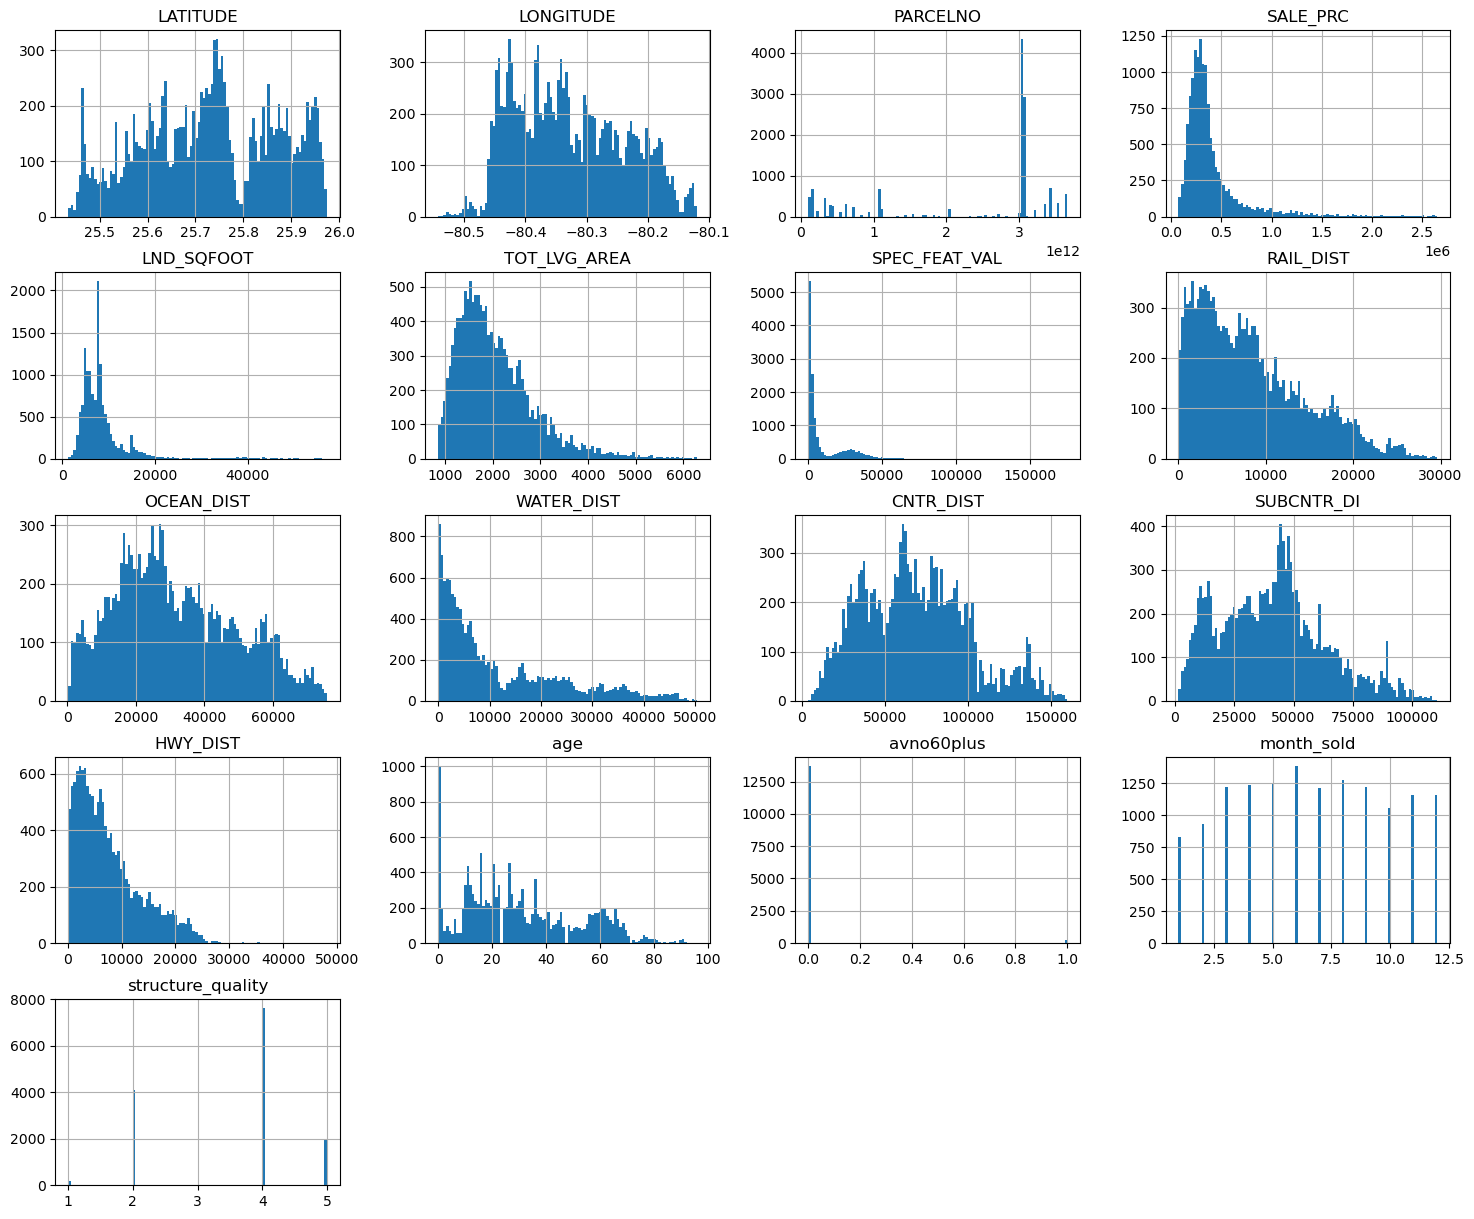

In [123]:
# Since there are many features we look at matrix firstly

data.hist(figsize=(18,15),bins=100)


In [124]:
# Rename of a column for better tracking purposes
data.rename(columns={'SALE_PRC':'Price'}, inplace=True)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  float64
 3   Price              13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [126]:
data['Price'].max()


2650000.0

In [127]:
data.columns

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'Price', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

In [128]:
data.shape

(13932, 17)

### PARCELNO is a unique identifier for each property, roughly 1% appear multiple times. Therefore this column can be dropped and explored later if necessary

In [129]:

df=data.drop(['PARCELNO'], axis=1)

In [130]:
df.columns

Index(['LATITUDE', 'LONGITUDE', 'Price', 'LND_SQFOOT', 'TOT_LVG_AREA',
       'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold',
       'structure_quality'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   Price              13932 non-null  float64
 3   LND_SQFOOT         13932 non-null  int64  
 4   TOT_LVG_AREA       13932 non-null  int64  
 5   SPEC_FEAT_VAL      13932 non-null  int64  
 6   RAIL_DIST          13932 non-null  float64
 7   OCEAN_DIST         13932 non-null  float64
 8   WATER_DIST         13932 non-null  float64
 9   CNTR_DIST          13932 non-null  float64
 10  SUBCNTR_DI         13932 non-null  float64
 11  HWY_DIST           13932 non-null  float64
 12  age                13932 non-null  int64  
 13  avno60plus         13932 non-null  int64  
 14  month_sold         13932 non-null  int64  
 15  structure_quality  13932 non-null  int64  
dtypes: float64(9), int64(7

<Axes: >

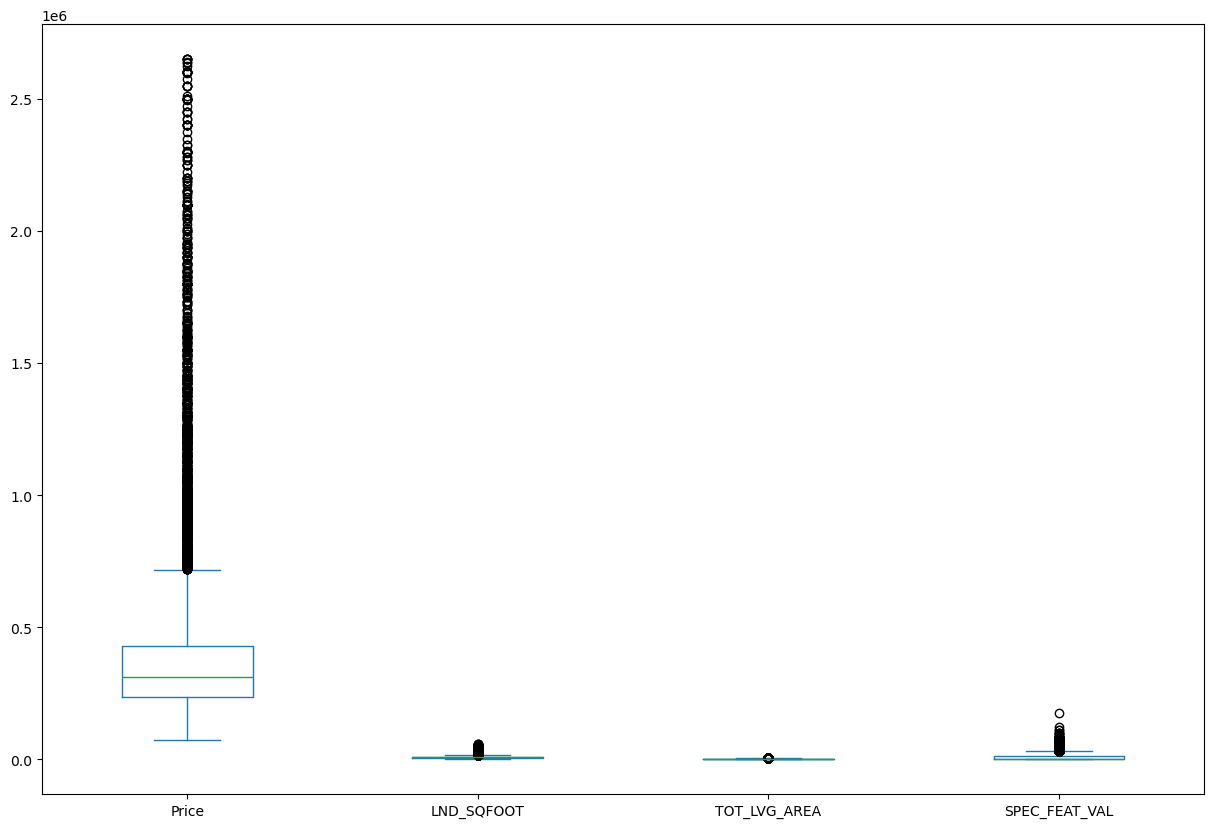

In [132]:
# Box plots for all features that are true numerical features - excluding ParcelNo, avno60plus, latitude/longitude splitting it up because of size
df[['Price', 'LND_SQFOOT', 'TOT_LVG_AREA','SPEC_FEAT_VAL']].plot.box(figsize = (15, 10))

In [133]:
df.columns


Index(['LATITUDE', 'LONGITUDE', 'Price', 'LND_SQFOOT', 'TOT_LVG_AREA',
       'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold',
       'structure_quality'],
      dtype='object')

<Axes: >

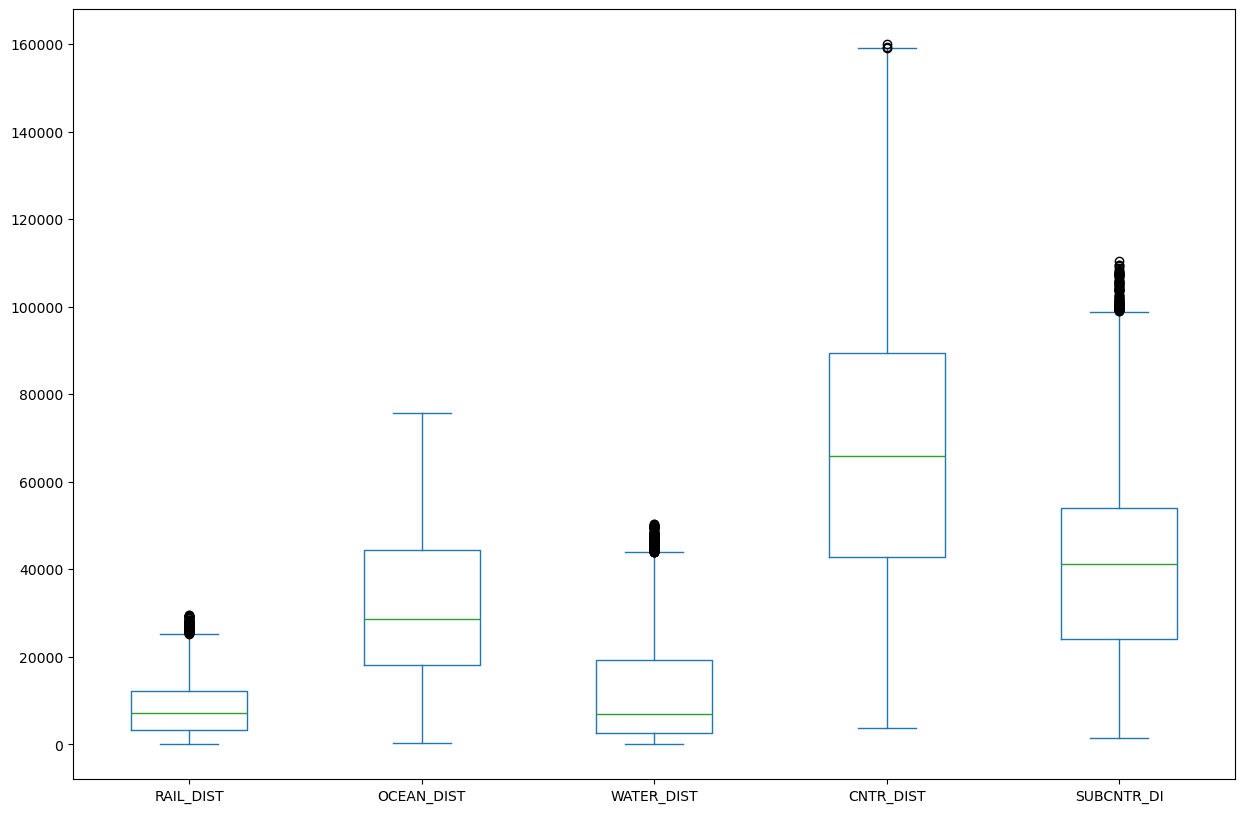

In [134]:
df[['RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST','CNTR_DIST','SUBCNTR_DI']].plot.box(figsize = (15, 10))

<Axes: >

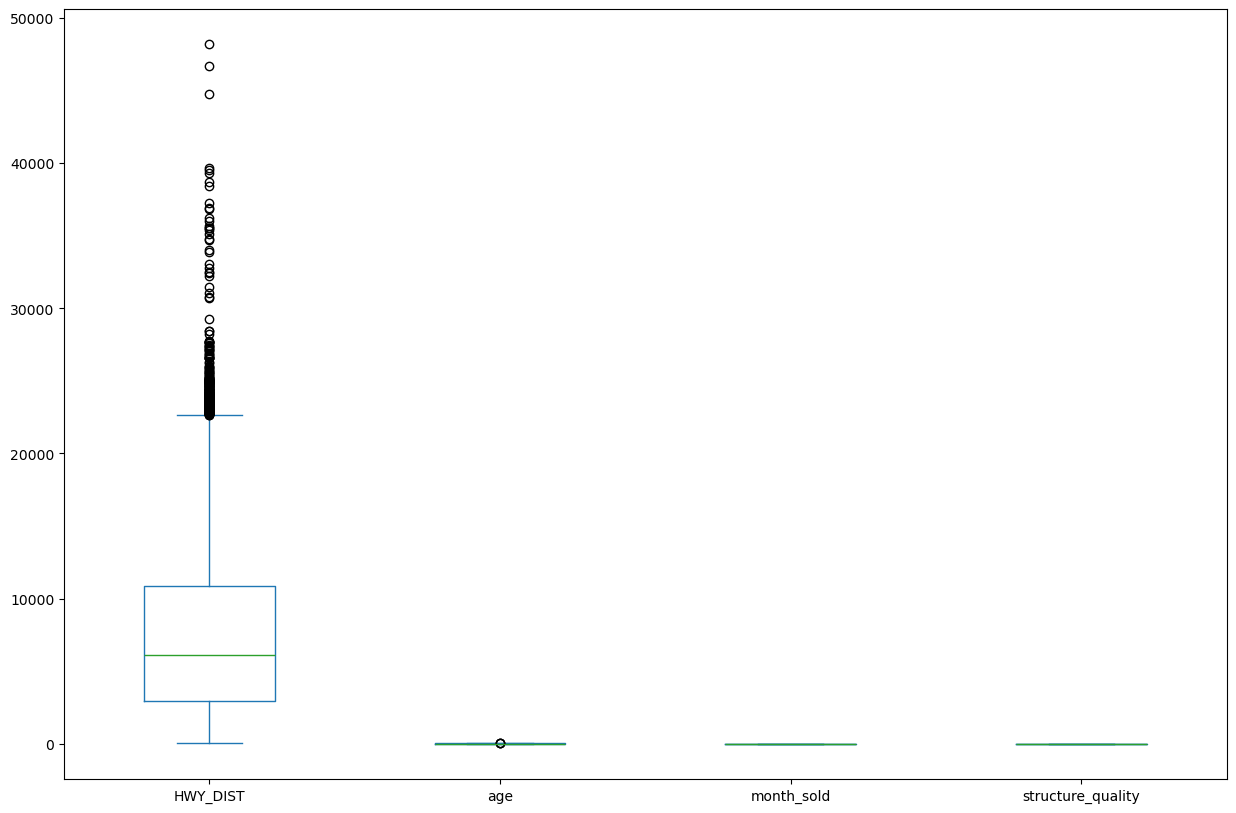

In [135]:
df[['HWY_DIST','age', 'month_sold', 'structure_quality']].plot.box(figsize = (15, 10))

## Outliers found in many features

In [136]:
# Create new column to show year it was built on
# to be consistent with present calcualtions we use the reference year to be 2022
reference_year = 2022

data['YearBuilt']=reference_year - data['age']
#modify the numerical data as well

df['YearBuilt']=reference_year - df['age']
data['YearBuilt'].describe()

count    13932.000000
mean      1991.330749
std         21.153068
min       1926.000000
25%       1976.000000
50%       1996.000000
75%       2008.000000
max       2022.000000
Name: YearBuilt, dtype: float64

In [137]:
df.columns

Index(['LATITUDE', 'LONGITUDE', 'Price', 'LND_SQFOOT', 'TOT_LVG_AREA',
       'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold',
       'structure_quality', 'YearBuilt'],
      dtype='object')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   Price              13932 non-null  float64
 3   LND_SQFOOT         13932 non-null  int64  
 4   TOT_LVG_AREA       13932 non-null  int64  
 5   SPEC_FEAT_VAL      13932 non-null  int64  
 6   RAIL_DIST          13932 non-null  float64
 7   OCEAN_DIST         13932 non-null  float64
 8   WATER_DIST         13932 non-null  float64
 9   CNTR_DIST          13932 non-null  float64
 10  SUBCNTR_DI         13932 non-null  float64
 11  HWY_DIST           13932 non-null  float64
 12  age                13932 non-null  int64  
 13  avno60plus         13932 non-null  int64  
 14  month_sold         13932 non-null  int64  
 15  structure_quality  13932 non-null  int64  
 16  YearBuilt          139

<Axes: >

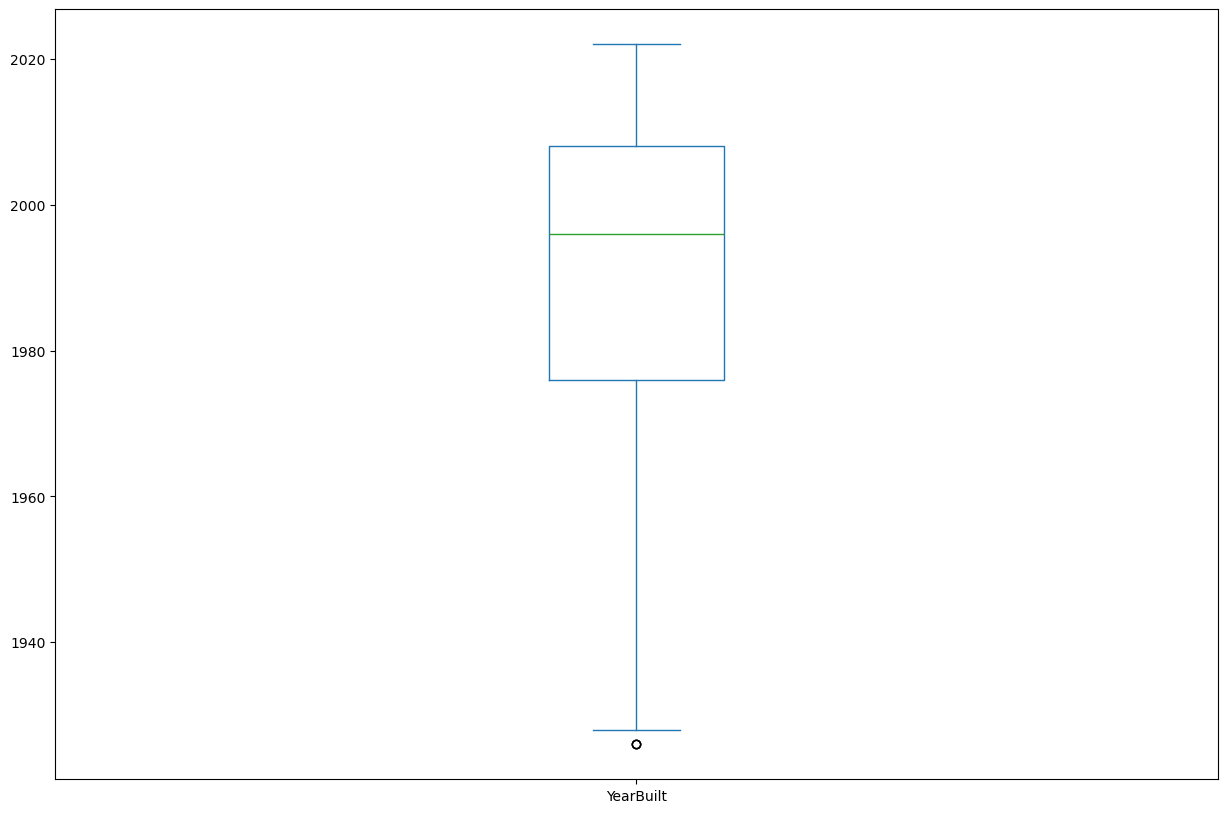

In [140]:
df[['YearBuilt']].plot.box(figsize = (15, 10))

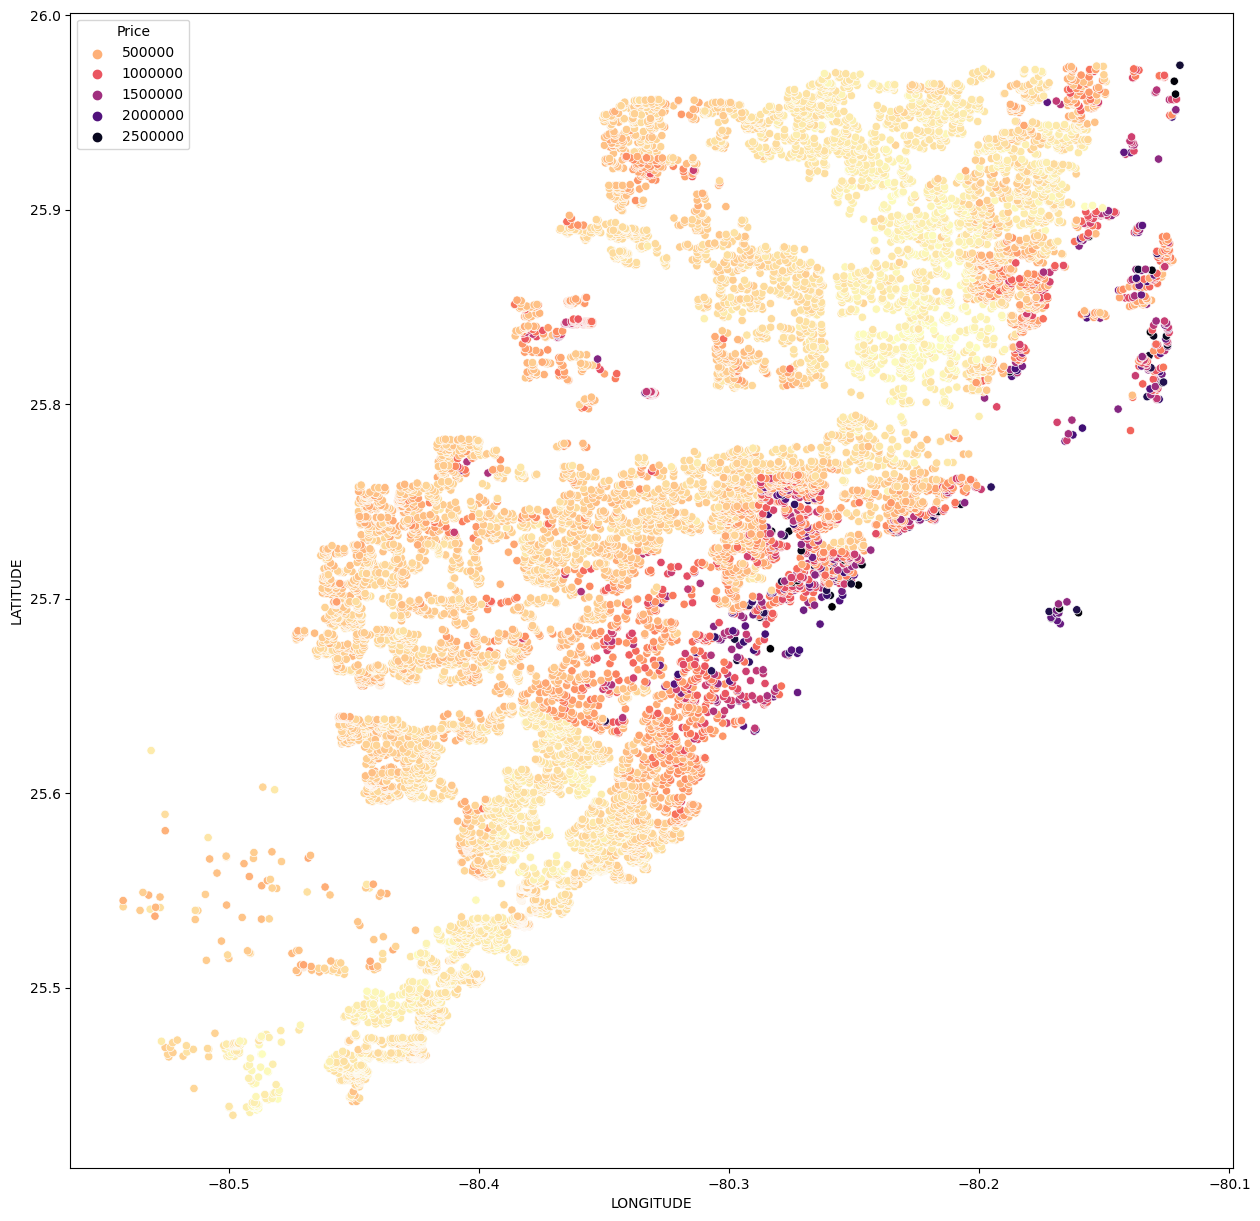

In [141]:
# plotting latitude and longitude as a visual scatter plot to look for location-based outliers

plt.figure(figsize=(15,15))

sns.scatterplot(data=df, x="LONGITUDE", y="LATITUDE", hue="Price", palette="magma_r");

In [142]:
# The viz above indicates that location is important to price

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   Price              13932 non-null  float64
 3   LND_SQFOOT         13932 non-null  int64  
 4   TOT_LVG_AREA       13932 non-null  int64  
 5   SPEC_FEAT_VAL      13932 non-null  int64  
 6   RAIL_DIST          13932 non-null  float64
 7   OCEAN_DIST         13932 non-null  float64
 8   WATER_DIST         13932 non-null  float64
 9   CNTR_DIST          13932 non-null  float64
 10  SUBCNTR_DI         13932 non-null  float64
 11  HWY_DIST           13932 non-null  float64
 12  age                13932 non-null  int64  
 13  avno60plus         13932 non-null  int64  
 14  month_sold         13932 non-null  int64  
 15  structure_quality  13932 non-null  int64  
 16  YearBuilt          139

In [144]:
df.shape

(13932, 17)

In [145]:
dfa=df

In [146]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   Price              13932 non-null  float64
 3   LND_SQFOOT         13932 non-null  int64  
 4   TOT_LVG_AREA       13932 non-null  int64  
 5   SPEC_FEAT_VAL      13932 non-null  int64  
 6   RAIL_DIST          13932 non-null  float64
 7   OCEAN_DIST         13932 non-null  float64
 8   WATER_DIST         13932 non-null  float64
 9   CNTR_DIST          13932 non-null  float64
 10  SUBCNTR_DI         13932 non-null  float64
 11  HWY_DIST           13932 non-null  float64
 12  age                13932 non-null  int64  
 13  avno60plus         13932 non-null  int64  
 14  month_sold         13932 non-null  int64  
 15  structure_quality  13932 non-null  int64  
 16  YearBuilt          139

In [147]:
# Z score method
from scipy import stats
#create list of numerical columns
cols=list(dfa.select_dtypes(exclude=('bool','object')).columns)



for col in cols:
    col_zscore = col + '_zscore'
    dfa[col_zscore] = (np.abs(stats.zscore(df[col])))
#Datacheck now    
dfa.shape


(13932, 34)

In [149]:
dfa.columns

Index(['LATITUDE', 'LONGITUDE', 'Price', 'LND_SQFOOT', 'TOT_LVG_AREA',
       'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold',
       'structure_quality', 'YearBuilt', 'LATITUDE_zscore', 'LONGITUDE_zscore',
       'Price_zscore', 'LND_SQFOOT_zscore', 'TOT_LVG_AREA_zscore',
       'SPEC_FEAT_VAL_zscore', 'RAIL_DIST_zscore', 'OCEAN_DIST_zscore',
       'WATER_DIST_zscore', 'CNTR_DIST_zscore', 'SUBCNTR_DI_zscore',
       'HWY_DIST_zscore', 'age_zscore', 'avno60plus_zscore',
       'month_sold_zscore', 'structure_quality_zscore', 'YearBuilt_zscore'],
      dtype='object')

In [150]:
#Begin Dropping rows with extreme values,  some are very far outliers and won't lead to good modelliung of the price


dfa= dfa.loc[dfa['LND_SQFOOT_zscore']<3]
dfa= dfa.loc[dfa['TOT_LVG_AREA_zscore']<3]
dfa= dfa.loc[dfa['SPEC_FEAT_VAL_zscore']<3]
dfa= dfa.loc[dfa['RAIL_DIST_zscore']<3]
dfa= dfa.loc[dfa['OCEAN_DIST_zscore']<3]
dfa= dfa.loc[dfa['WATER_DIST_zscore']<3]
dfa= dfa.loc[dfa['CNTR_DIST_zscore']<3]
dfa=dfa.loc[dfa['SUBCNTR_DI_zscore']<3]
dfa= dfa.loc[dfa['HWY_DIST_zscore']<3]
dfa= dfa.loc[dfa['age_zscore']<3]
dfa= dfa.loc[dfa['YearBuilt_zscore']<3]


In [151]:
# A lot of our variables are not normally shaped, so we can't reliably remove all outliers via standard deviation.
# We will use IQR to further filter our outliers with the following function

def iqr_outliers(column):
    """return the lower range and upper range for the data based on IQR*1.5"""
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.5 * iqr)
    upper_range = Q3 + (1.5 * iqr)
    return lower_range,upper_range  


In [152]:
# determing our IQR for price, lot size, sq footage and longitude
landlower,landupper = iqr_outliers(dfa.LND_SQFOOT)
sqftlower, sqftupper = iqr_outliers(dfa.TOT_LVG_AREA)
pricelower, priceupper = iqr_outliers(dfa.Price)
# dropping the things outside of our lower and upper range
dfa.drop(dfa[ (dfa.LND_SQFOOT > landupper) | (dfa.LND_SQFOOT < landlower) ].index , inplace=True)
dfa.drop(dfa[ (dfa.TOT_LVG_AREA > sqftupper) | (dfa.TOT_LVG_AREA < sqftlower) ].index , inplace=True)
dfa.drop(dfa[ (dfa.Price > priceupper) | (dfa.Price < pricelower) ].index , inplace=True)

<Axes: >

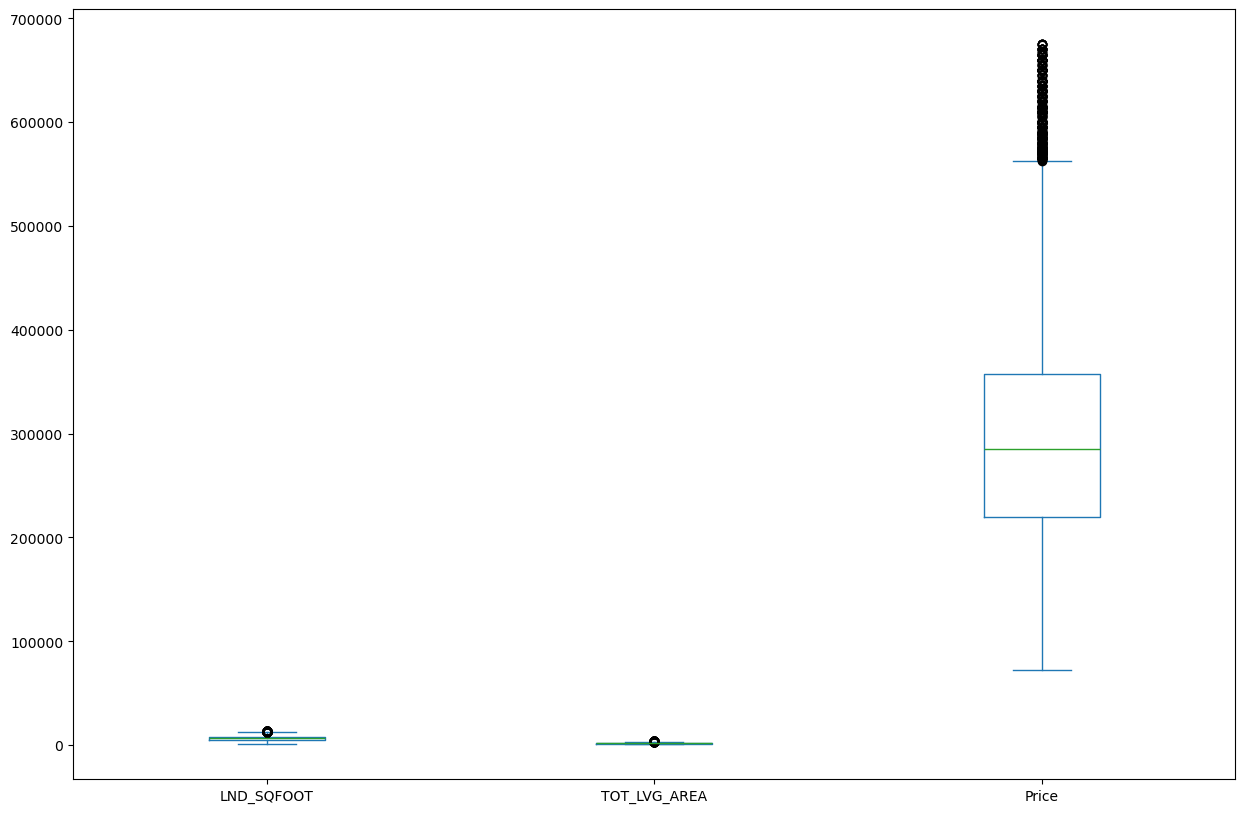

In [153]:
dfa[['LND_SQFOOT', 'TOT_LVG_AREA', 'Price']].plot.box(figsize = (15, 10))

In [154]:
dfa.shape

(11346, 34)

In [155]:
dfa.columns

Index(['LATITUDE', 'LONGITUDE', 'Price', 'LND_SQFOOT', 'TOT_LVG_AREA',
       'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold',
       'structure_quality', 'YearBuilt', 'LATITUDE_zscore', 'LONGITUDE_zscore',
       'Price_zscore', 'LND_SQFOOT_zscore', 'TOT_LVG_AREA_zscore',
       'SPEC_FEAT_VAL_zscore', 'RAIL_DIST_zscore', 'OCEAN_DIST_zscore',
       'WATER_DIST_zscore', 'CNTR_DIST_zscore', 'SUBCNTR_DI_zscore',
       'HWY_DIST_zscore', 'age_zscore', 'avno60plus_zscore',
       'month_sold_zscore', 'structure_quality_zscore', 'YearBuilt_zscore'],
      dtype='object')

In [157]:
dfa['Price'].min()


72000.0

In [158]:
dfa['Price'].max()


675000.0

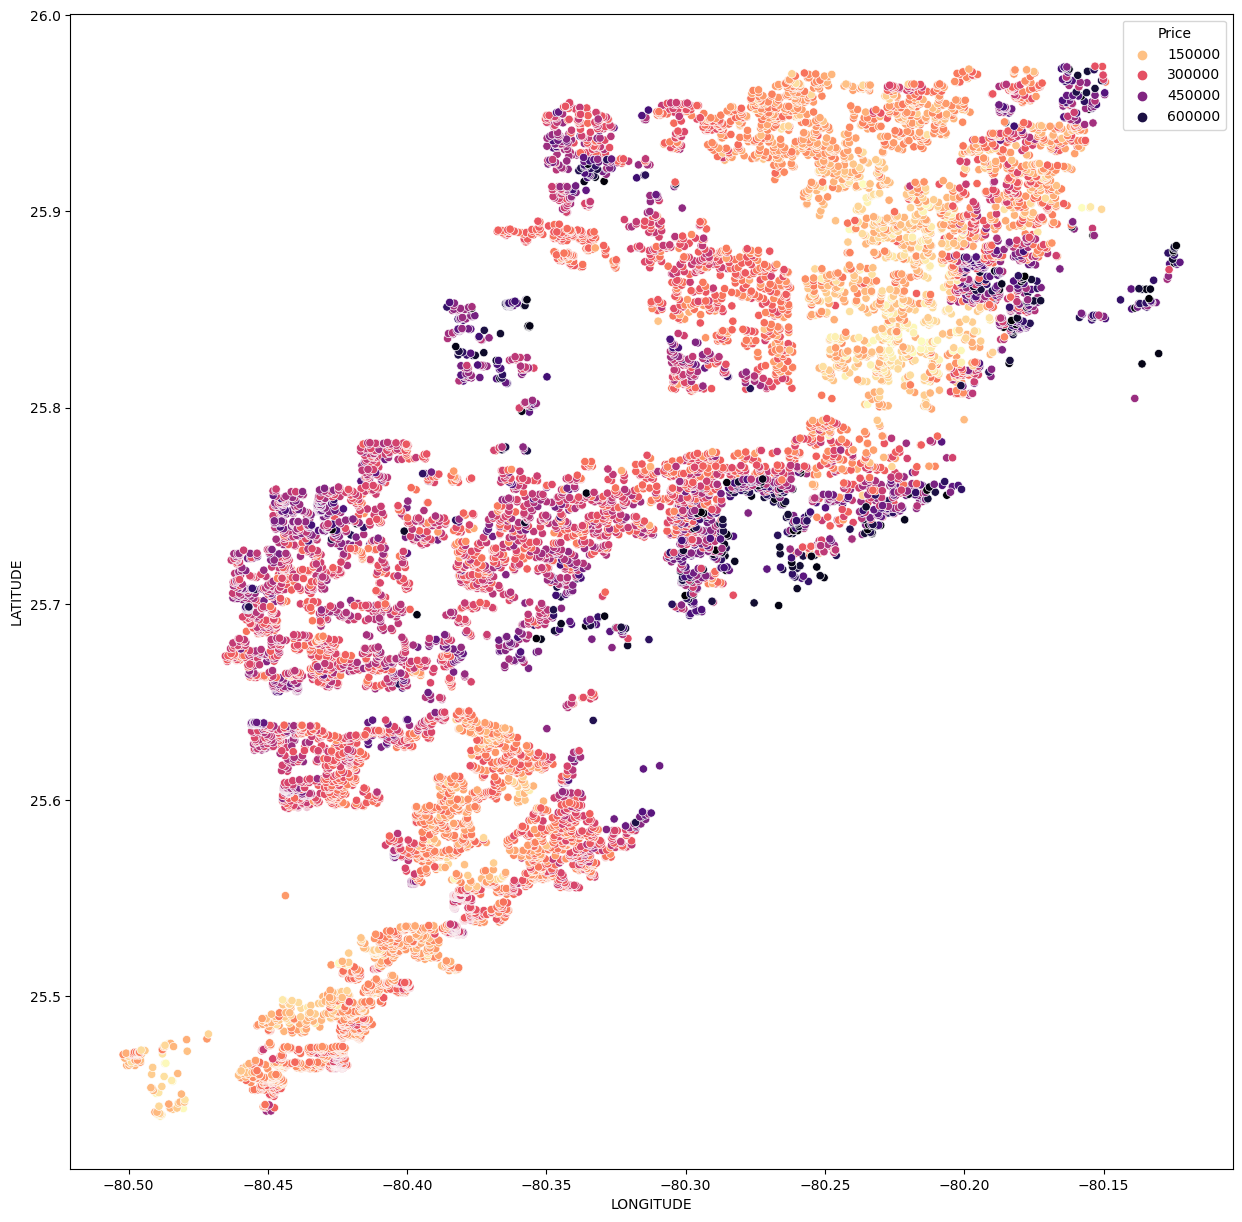

In [159]:
# plotting latitude and longitude as a visual scatter plot to look for location-based outliers

plt.figure(figsize=(15,15))

sns.scatterplot(data=dfa, x="LONGITUDE", y="LATITUDE", hue="Price", palette="magma_r");

array([[<Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'LND_SQFOOT'}>,
        <Axes: title={'center': 'TOT_LVG_AREA'}>,
        <Axes: title={'center': 'SPEC_FEAT_VAL'}>],
       [<Axes: title={'center': 'RAIL_DIST'}>,
        <Axes: title={'center': 'OCEAN_DIST'}>,
        <Axes: title={'center': 'WATER_DIST'}>,
        <Axes: title={'center': 'CNTR_DIST'}>,
        <Axes: title={'center': 'SUBCNTR_DI'}>,
        <Axes: title={'center': 'HWY_DIST'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avno60plus'}>,
        <Axes: title={'center': 'month_sold'}>,
        <Axes: title={'center': 'structure_quality'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'LATITUDE_zscore'}>],
       [<Axes: title={'center': 'LONGITUDE_zscore'}>,
        <Axes: title={'center': 'Price_zscore'}>,
        <Axes: title={'center': 

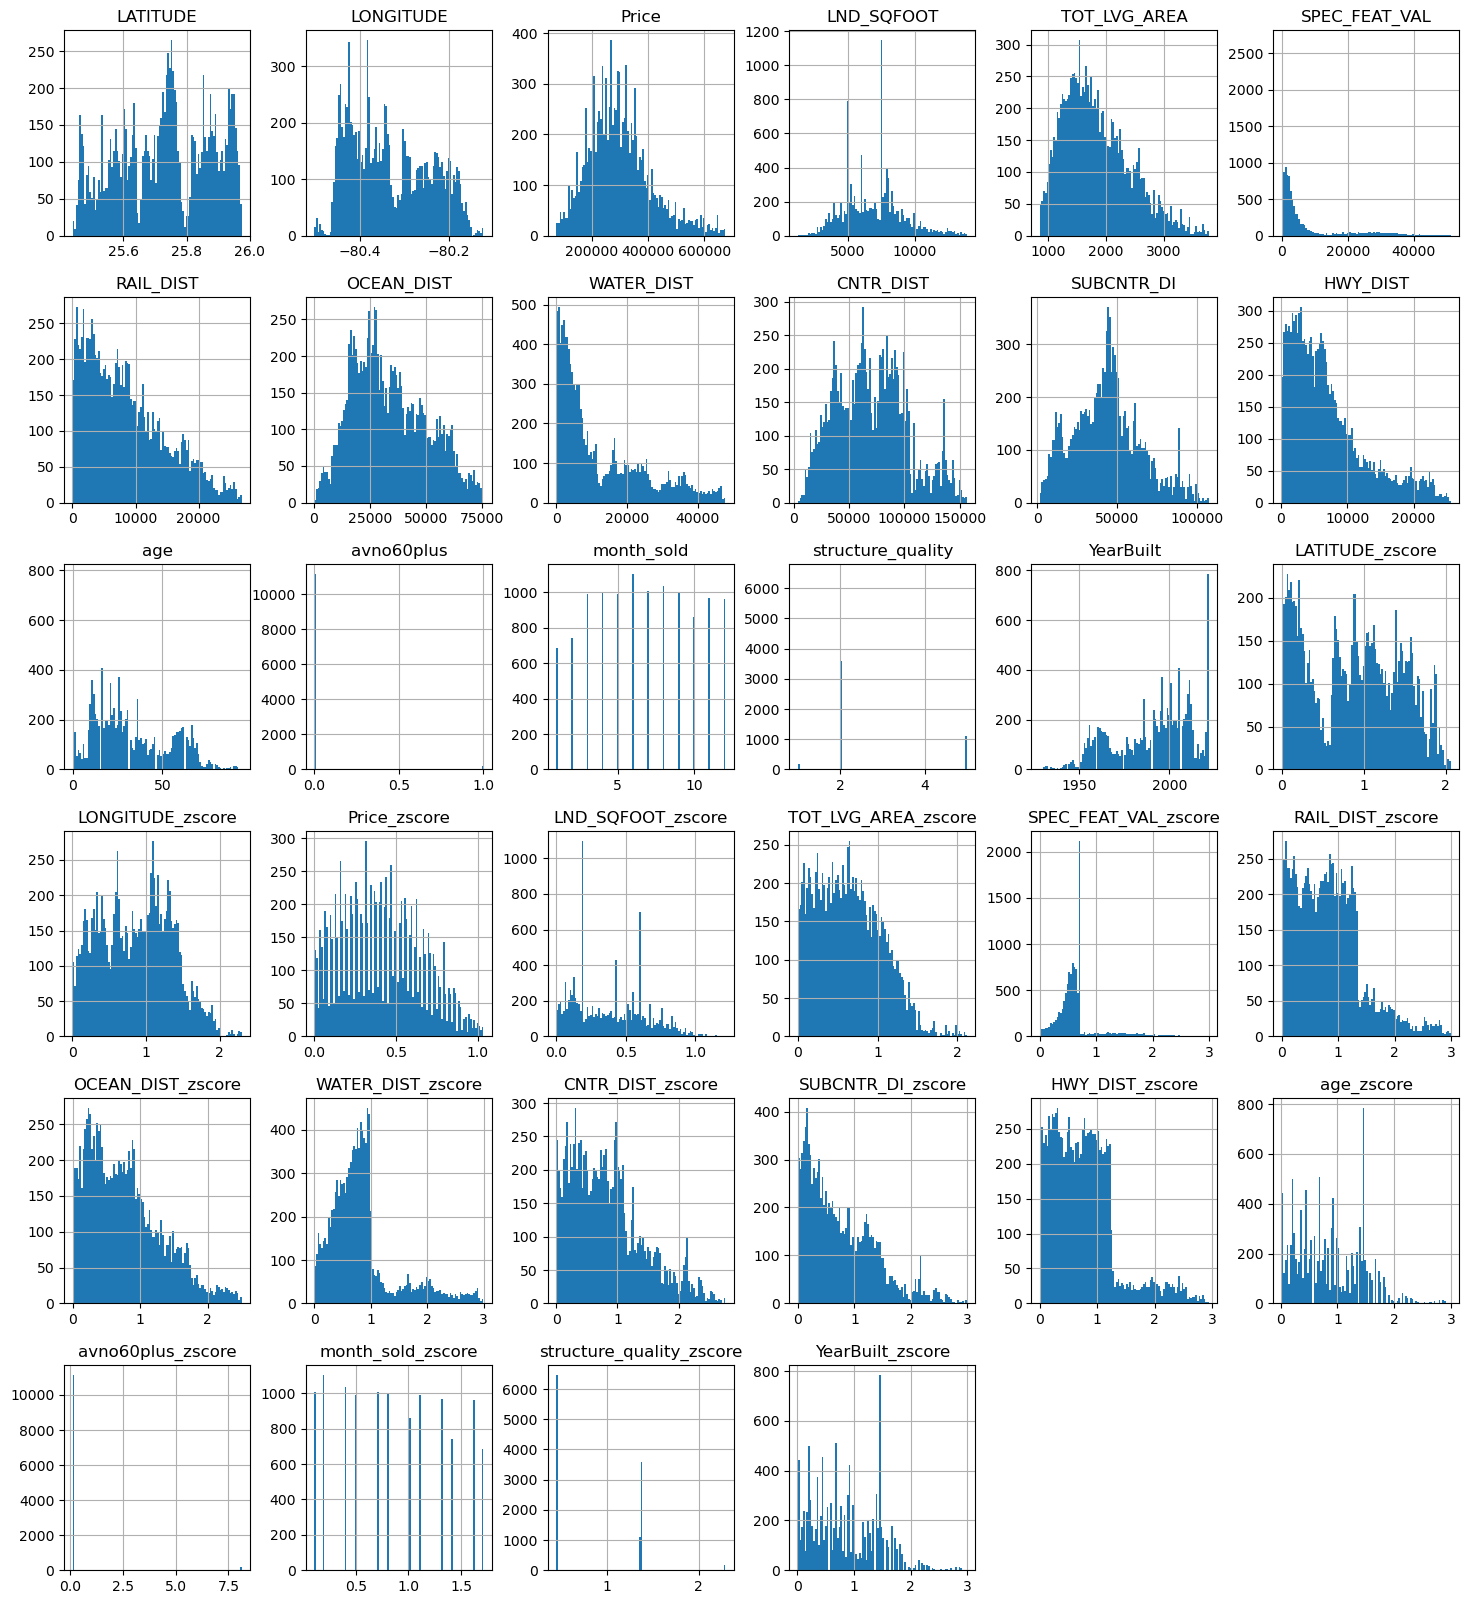

In [160]:
dfa.hist(figsize=(18,20), bins=100)

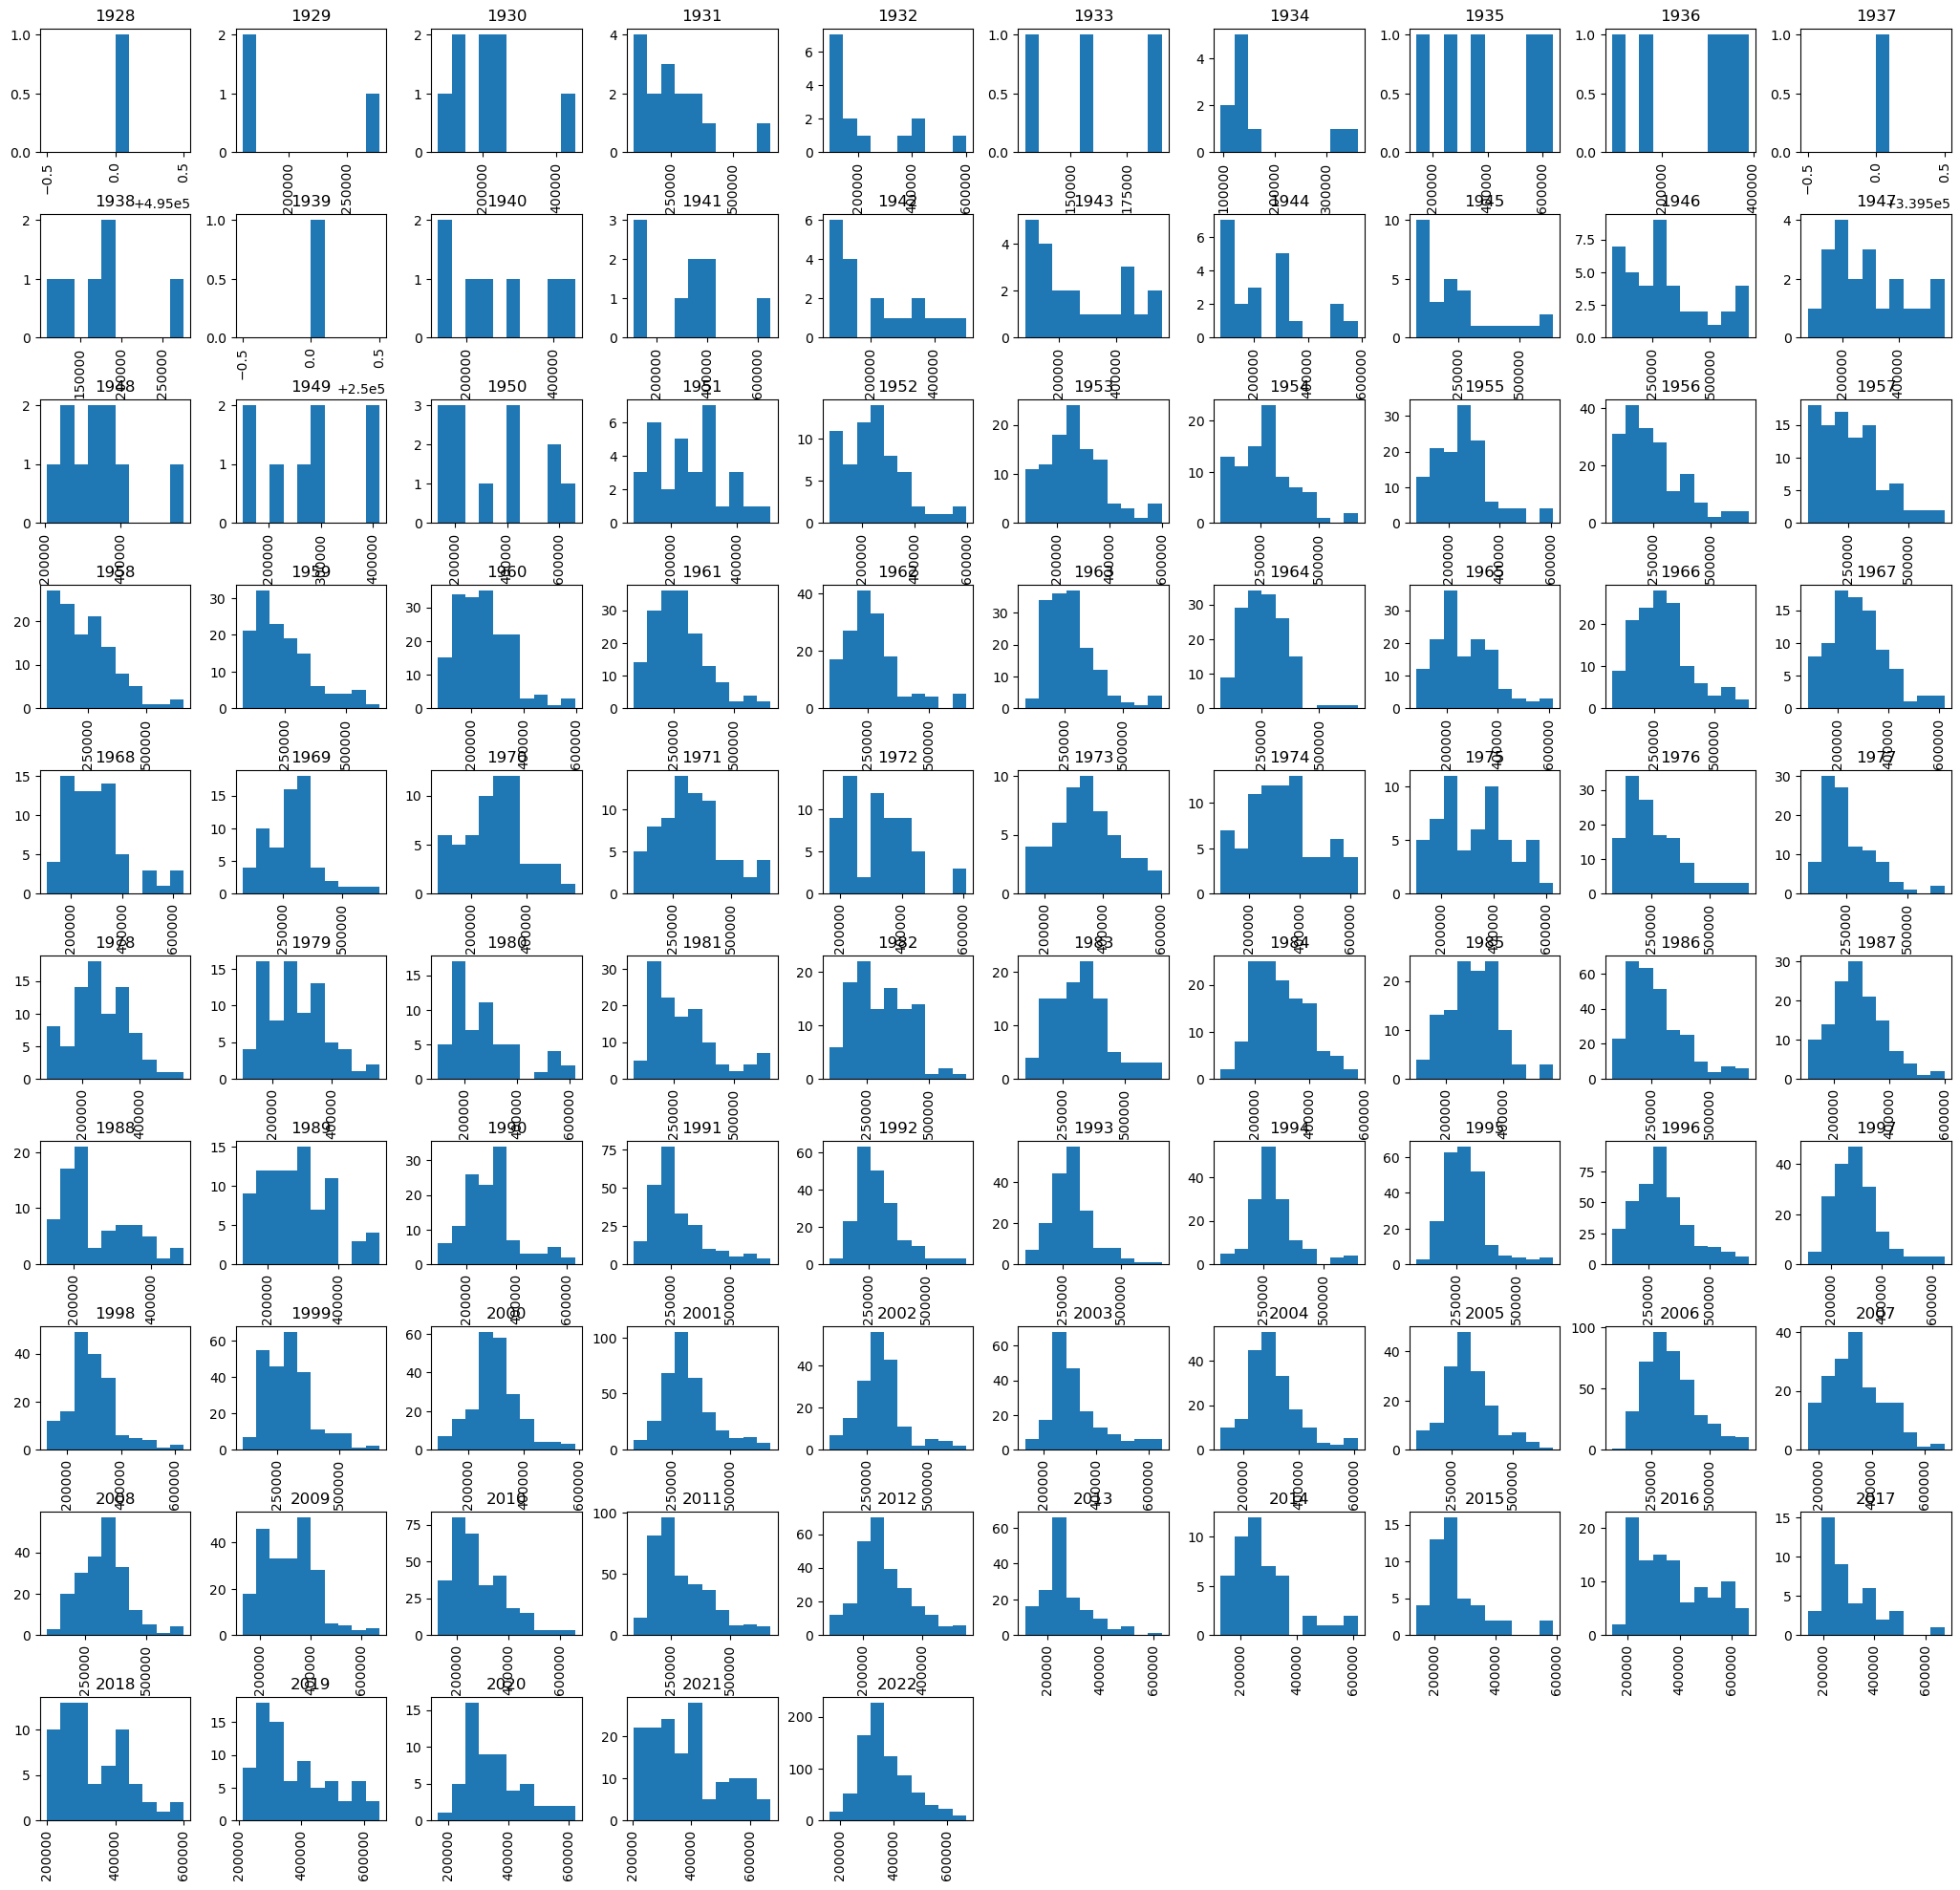

In [161]:
#Check influence of Year Built on price

dfa['Price'].hist(by=dfa['YearBuilt'], figsize=(25,25));  

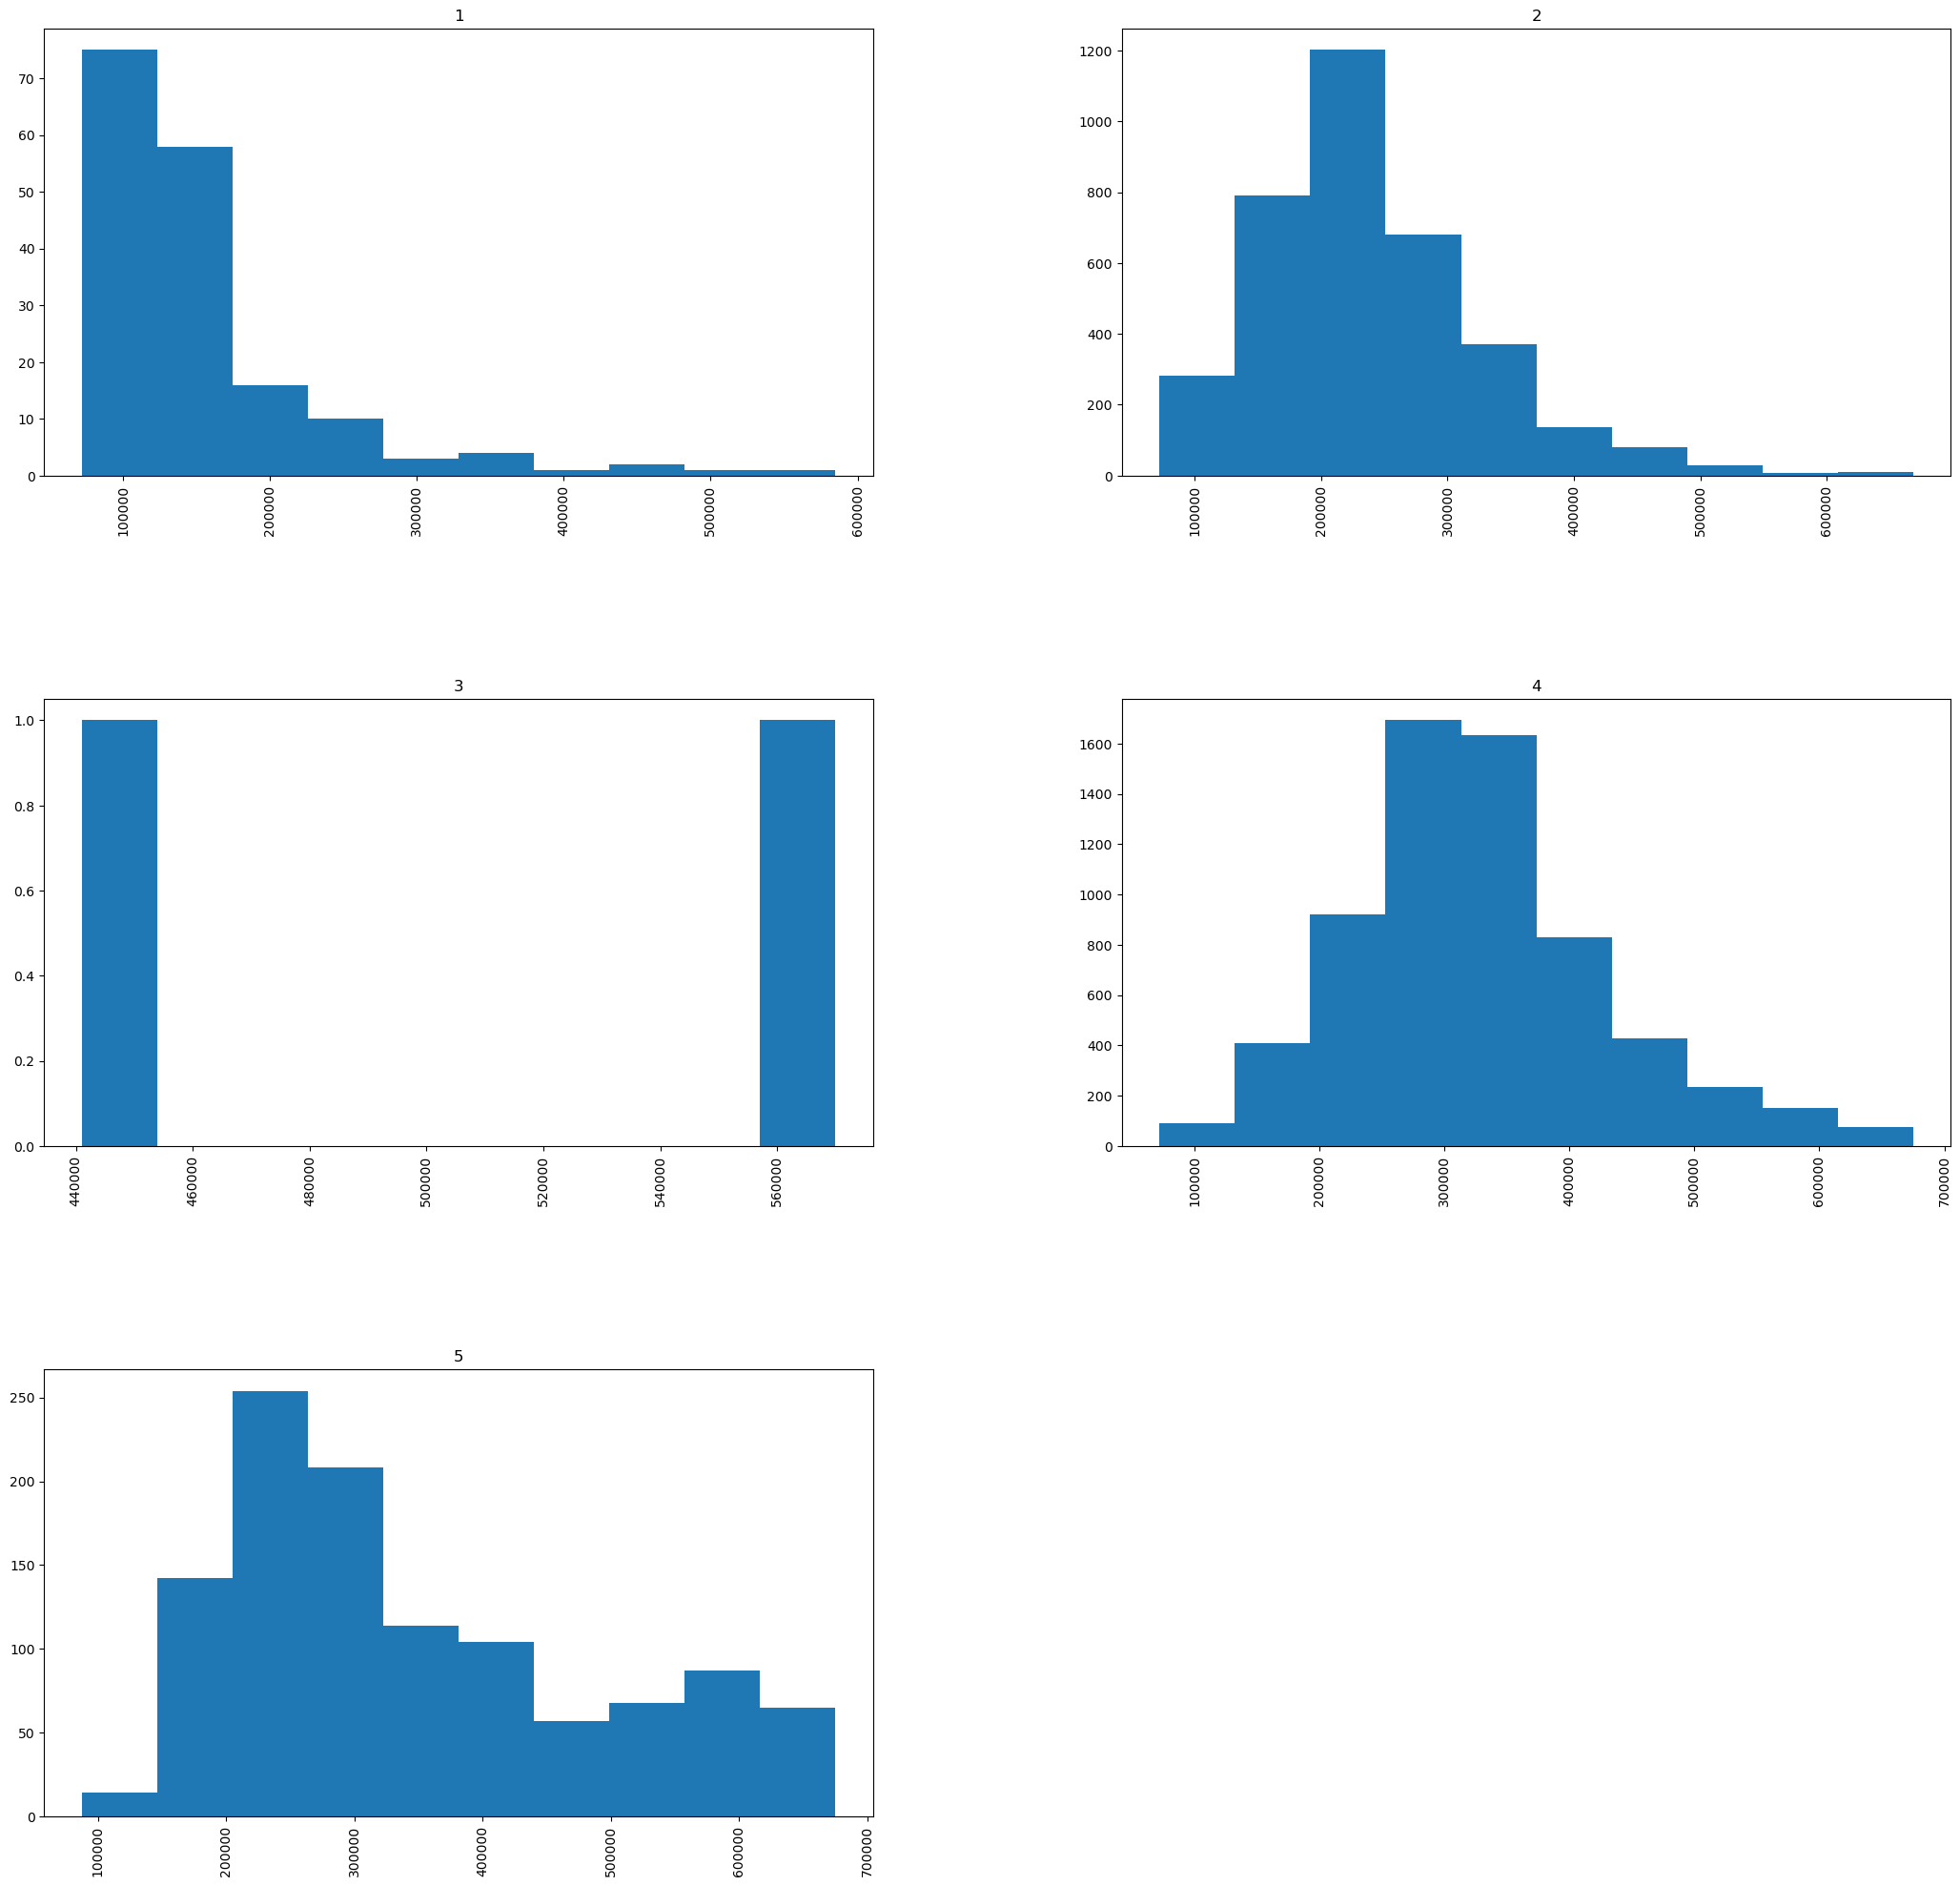

In [162]:
#Check influence of structure quality on price

dfa['Price'].hist(by=dfa['structure_quality'], figsize=(25,25));  

In [163]:
dfa.columns

Index(['LATITUDE', 'LONGITUDE', 'Price', 'LND_SQFOOT', 'TOT_LVG_AREA',
       'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold',
       'structure_quality', 'YearBuilt', 'LATITUDE_zscore', 'LONGITUDE_zscore',
       'Price_zscore', 'LND_SQFOOT_zscore', 'TOT_LVG_AREA_zscore',
       'SPEC_FEAT_VAL_zscore', 'RAIL_DIST_zscore', 'OCEAN_DIST_zscore',
       'WATER_DIST_zscore', 'CNTR_DIST_zscore', 'SUBCNTR_DI_zscore',
       'HWY_DIST_zscore', 'age_zscore', 'avno60plus_zscore',
       'month_sold_zscore', 'structure_quality_zscore', 'YearBuilt_zscore'],
      dtype='object')

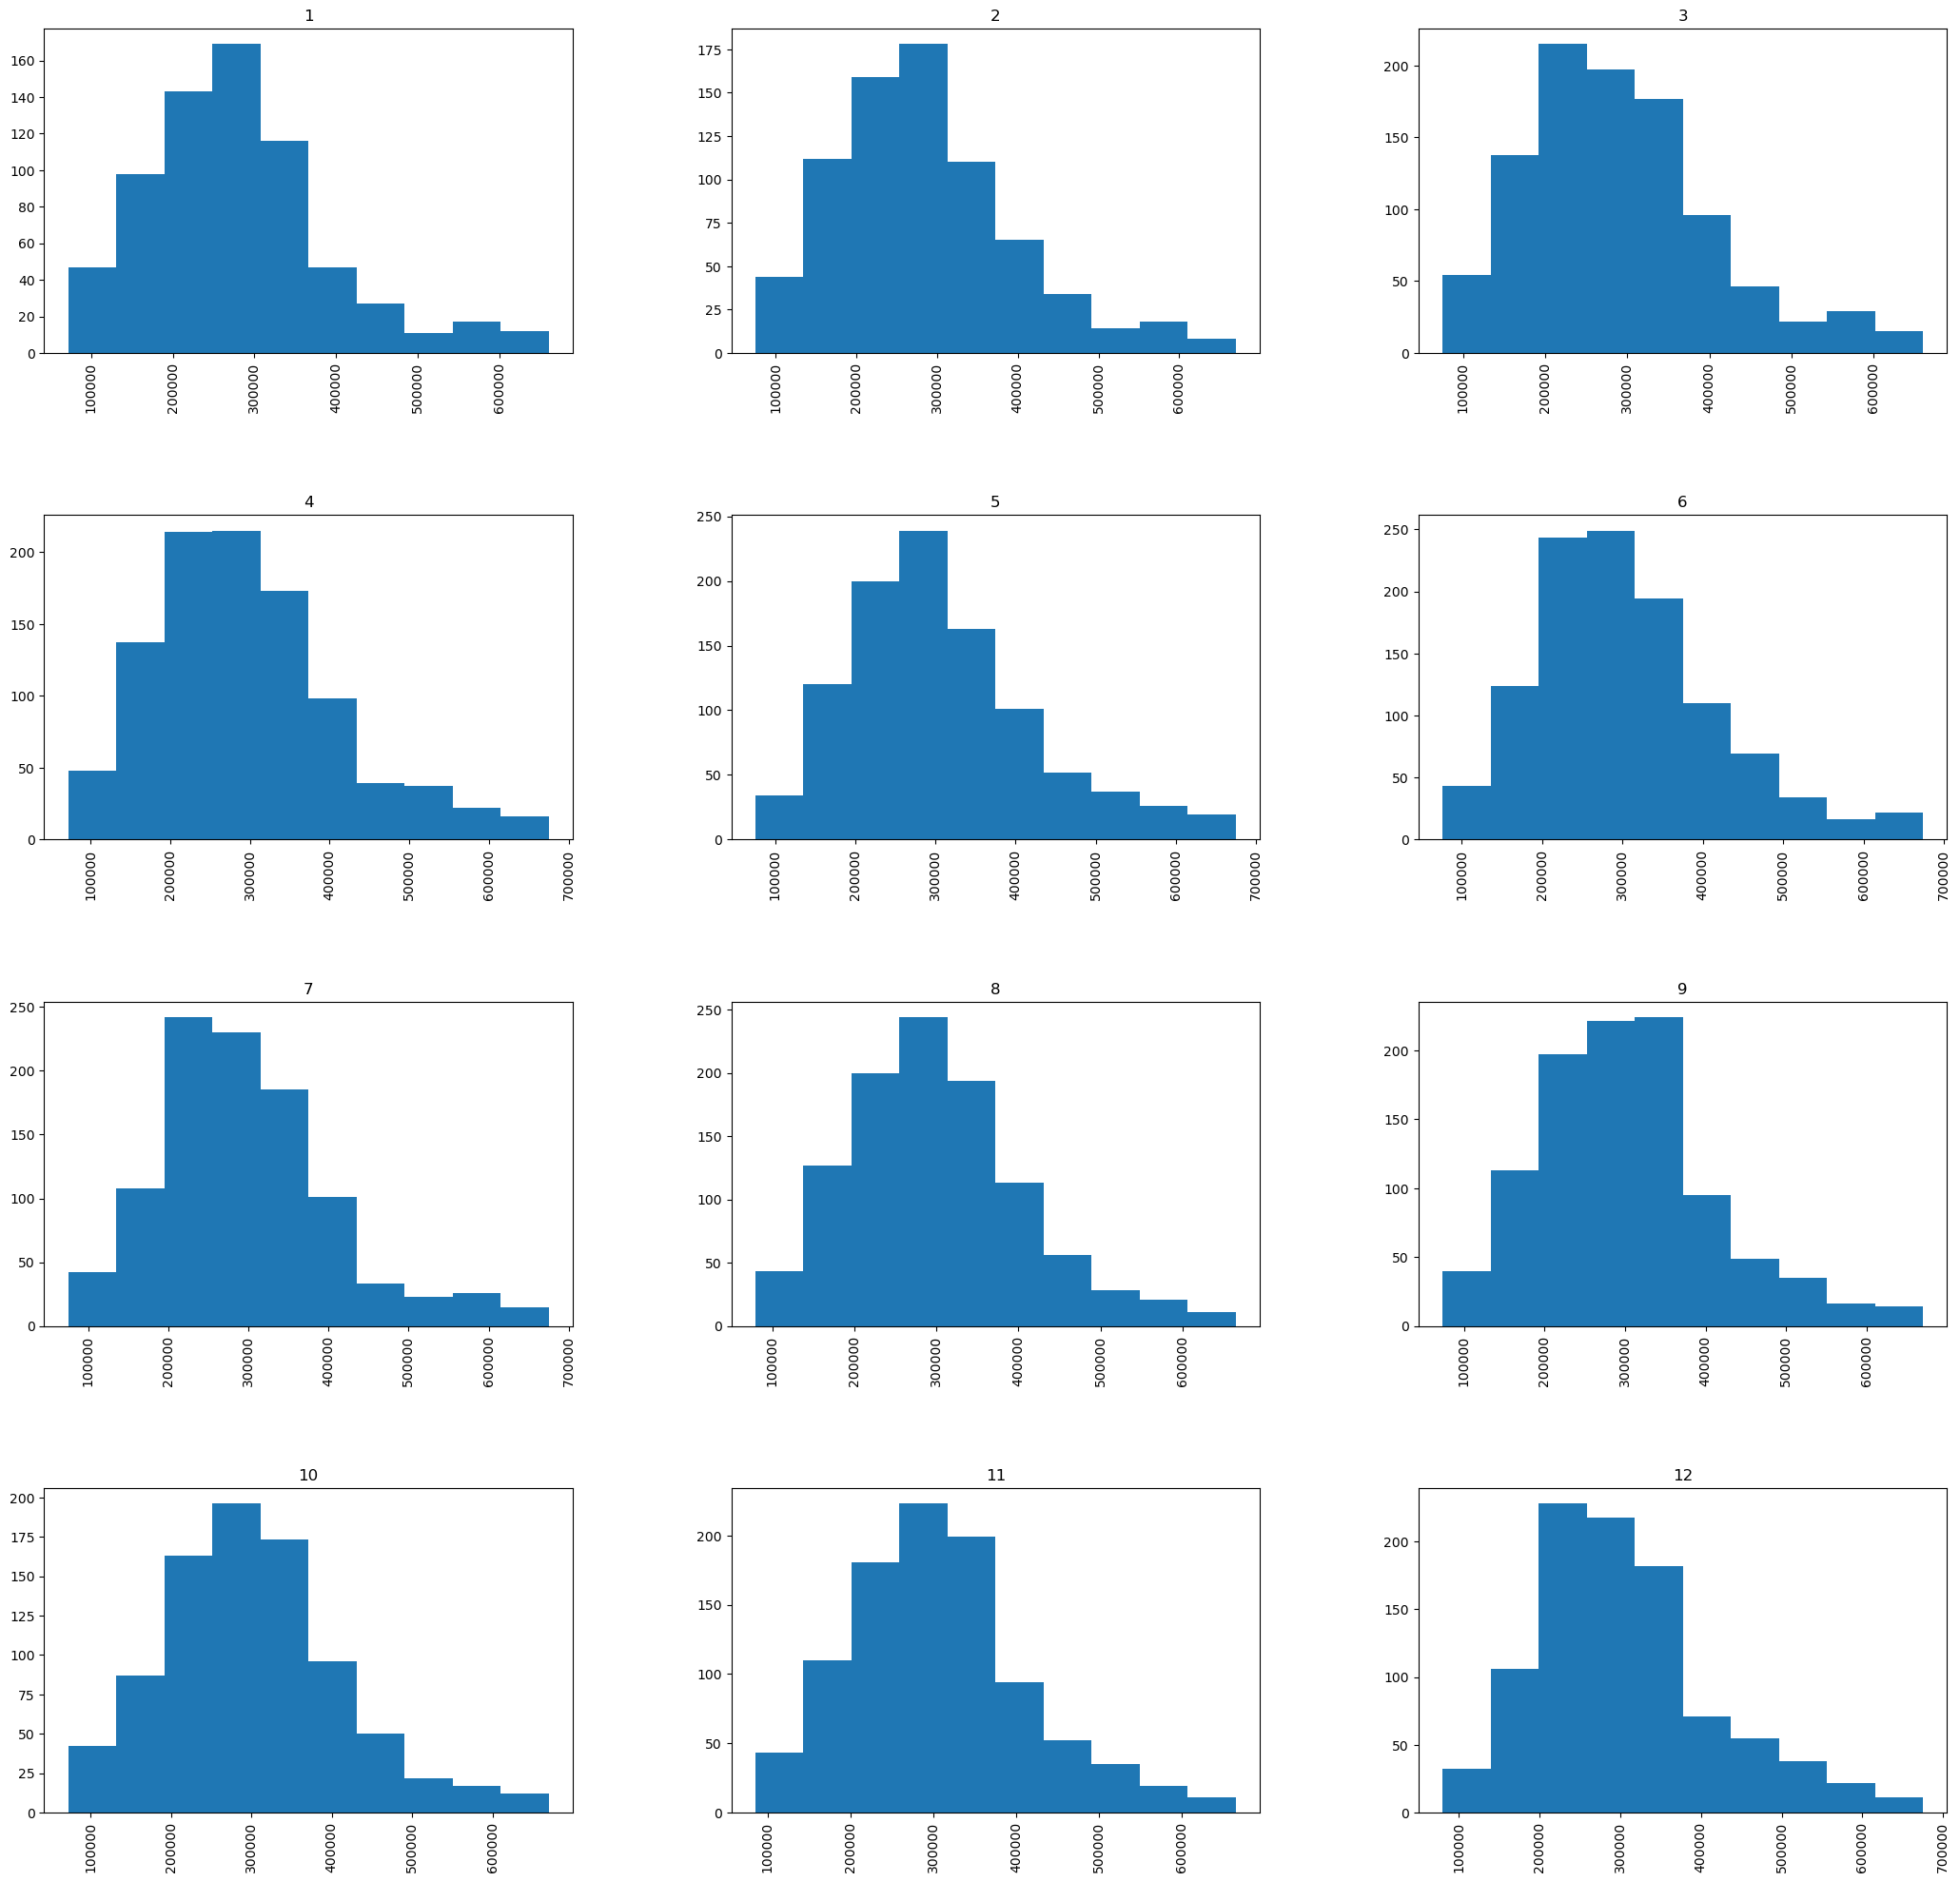

In [164]:
#Check influence of month of the year sold on price

dfa['Price'].hist(by=dfa['month_sold'], figsize=(25,25));  

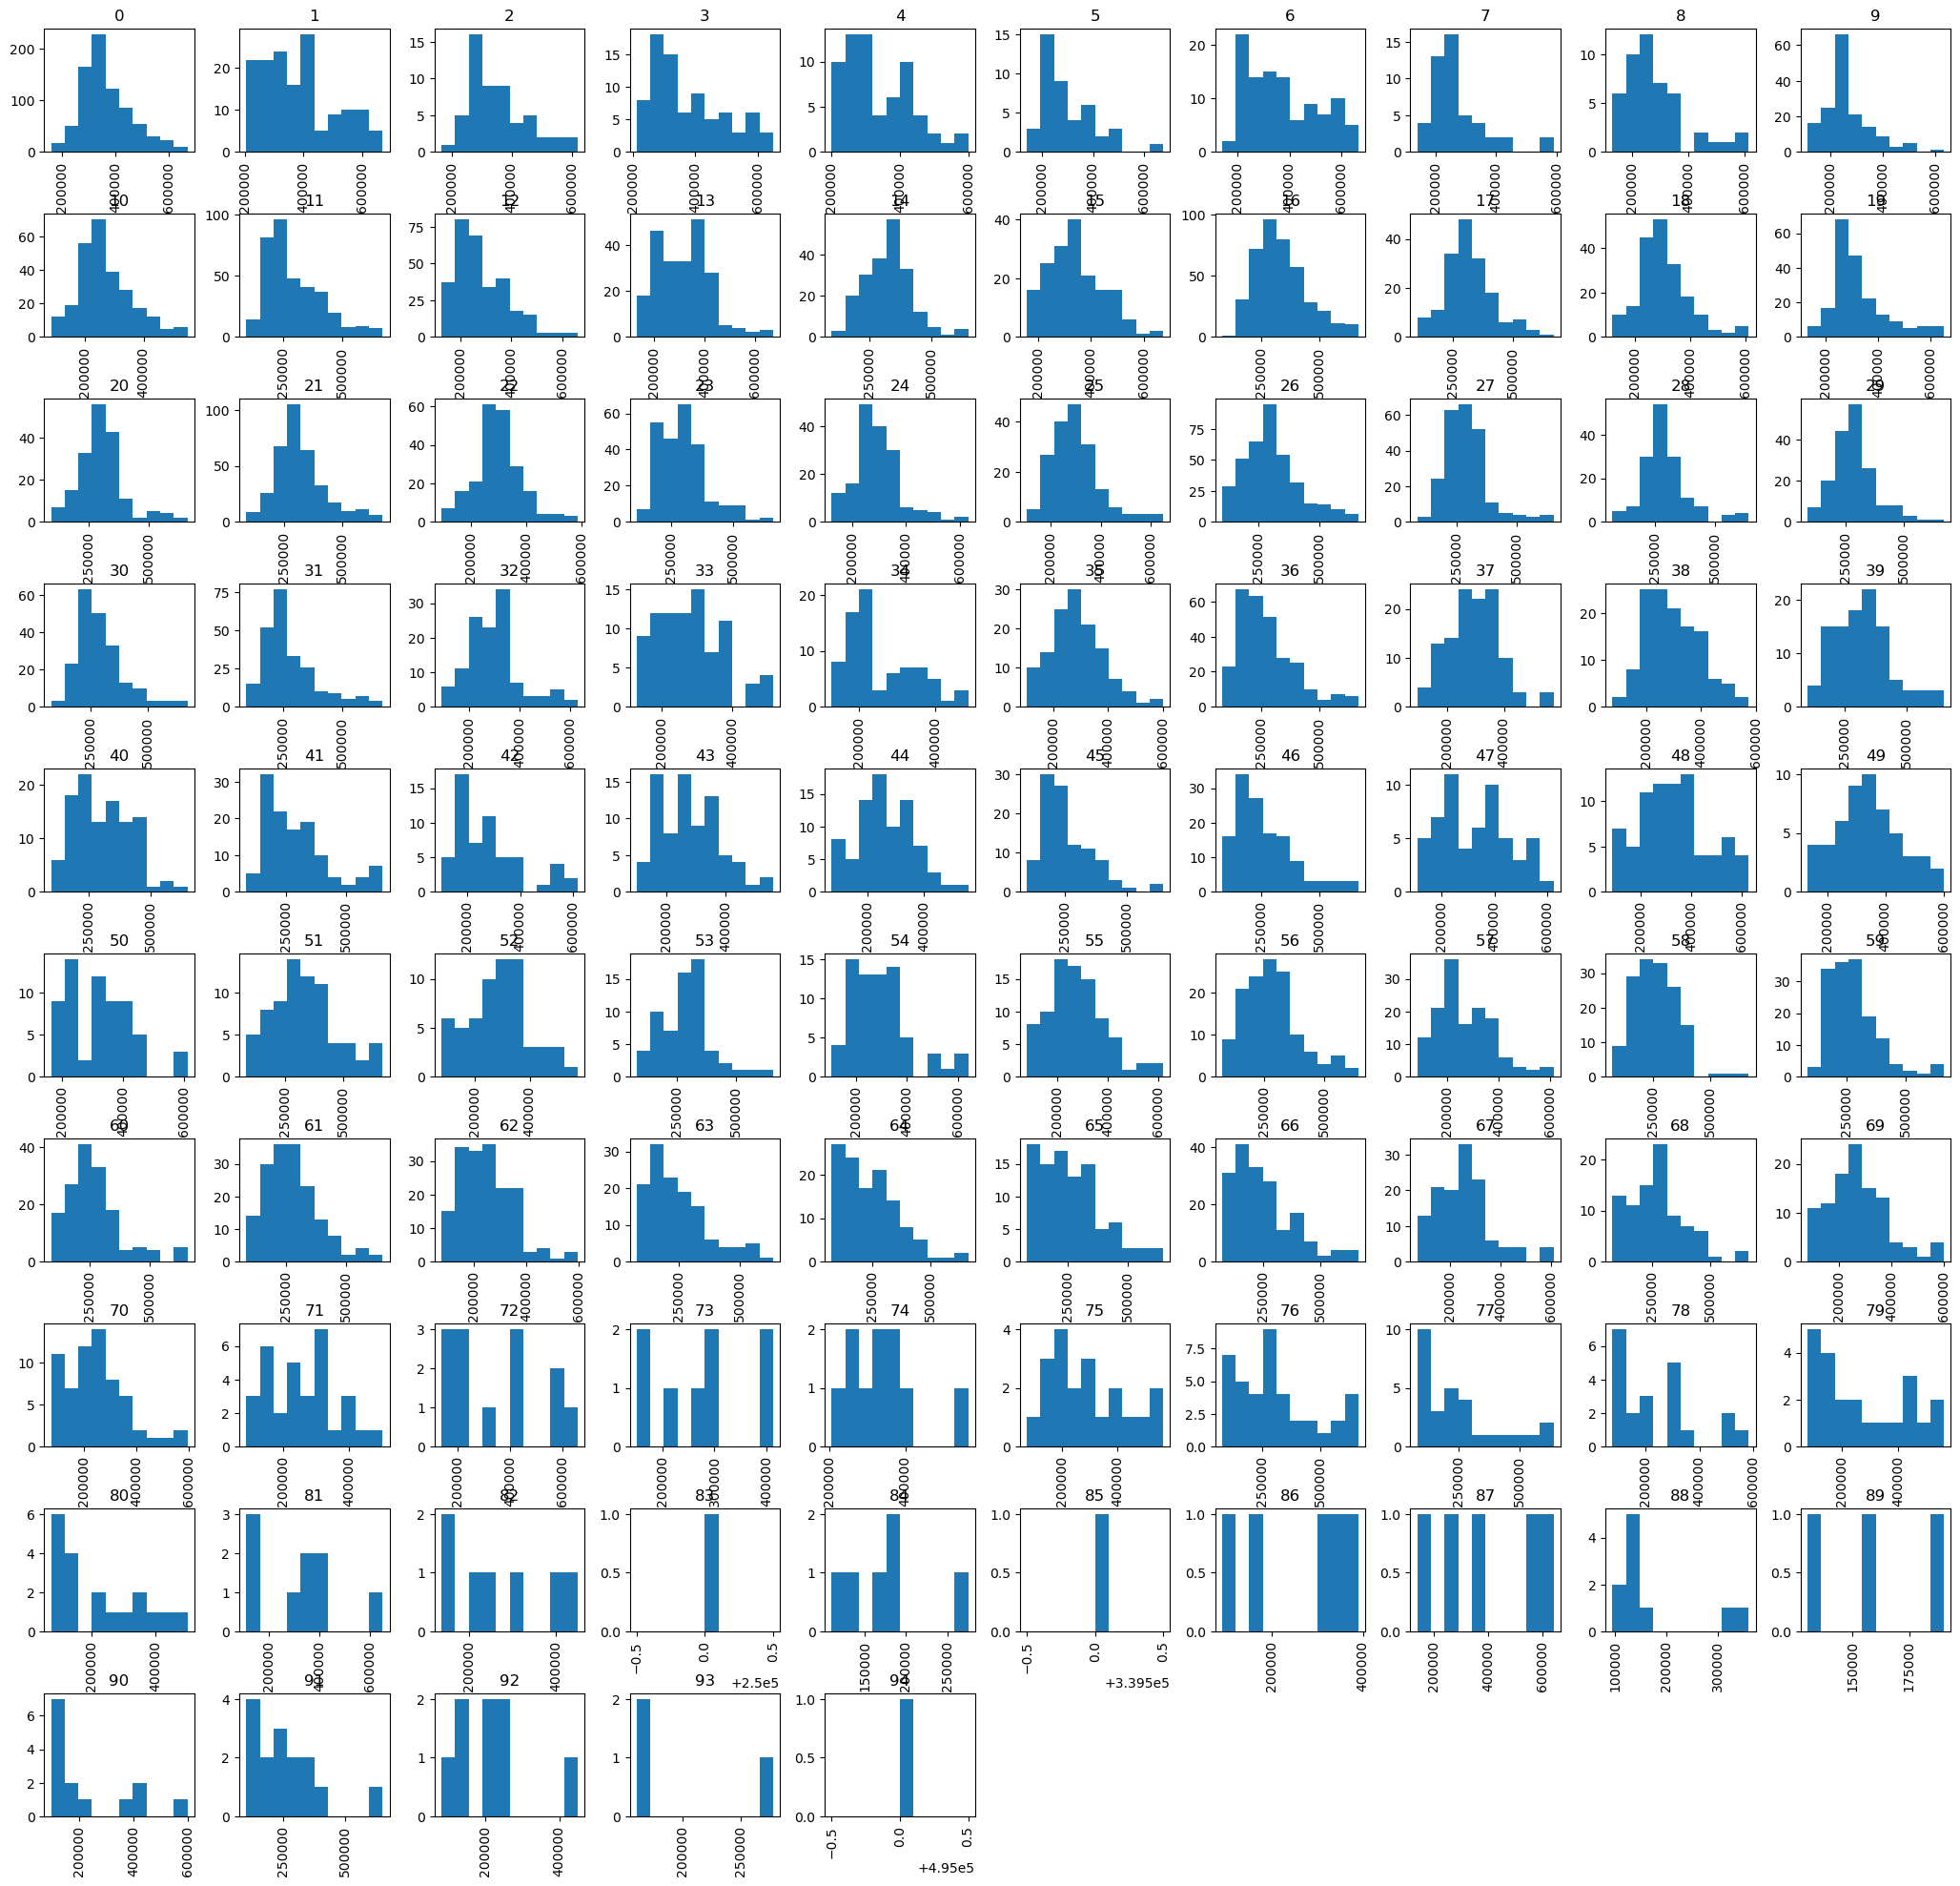

In [165]:
#Check influence of age on price

dfa['Price'].hist(by=dfa['age'], figsize=(25,25));  

In [166]:
dfa.columns

Index(['LATITUDE', 'LONGITUDE', 'Price', 'LND_SQFOOT', 'TOT_LVG_AREA',
       'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold',
       'structure_quality', 'YearBuilt', 'LATITUDE_zscore', 'LONGITUDE_zscore',
       'Price_zscore', 'LND_SQFOOT_zscore', 'TOT_LVG_AREA_zscore',
       'SPEC_FEAT_VAL_zscore', 'RAIL_DIST_zscore', 'OCEAN_DIST_zscore',
       'WATER_DIST_zscore', 'CNTR_DIST_zscore', 'SUBCNTR_DI_zscore',
       'HWY_DIST_zscore', 'age_zscore', 'avno60plus_zscore',
       'month_sold_zscore', 'structure_quality_zscore', 'YearBuilt_zscore'],
      dtype='object')

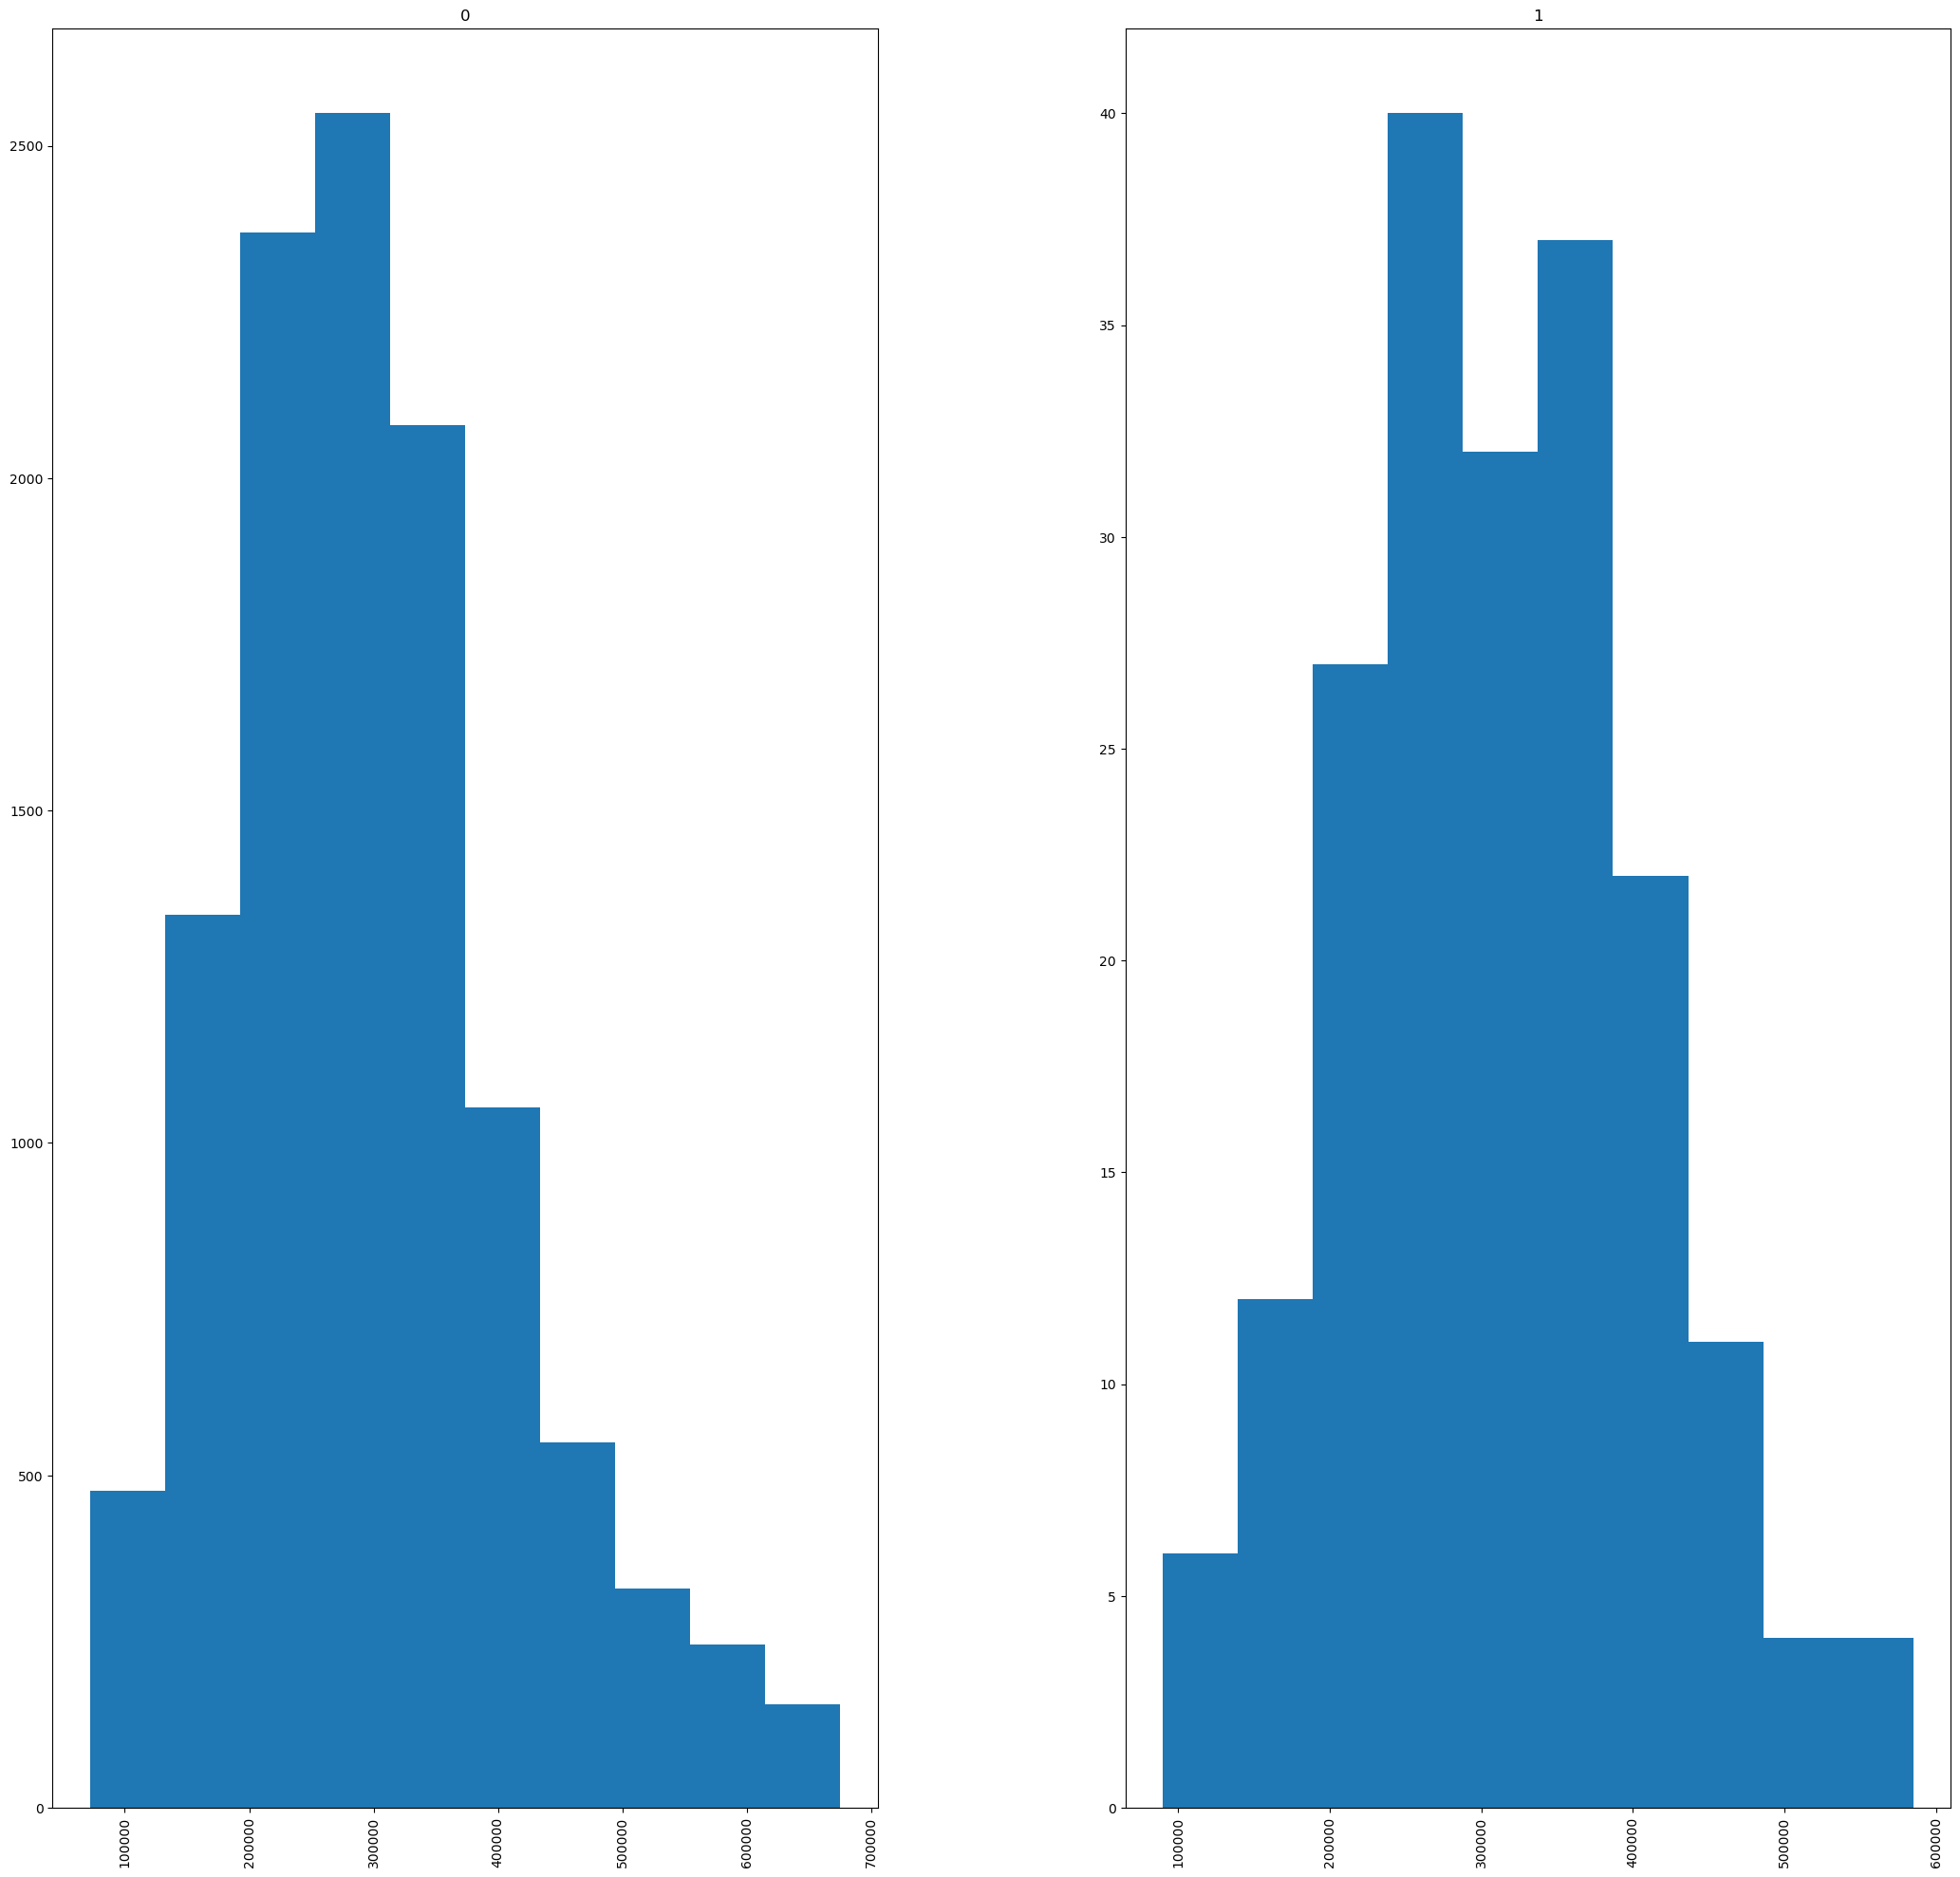

In [167]:
#Check influence of airplane noise exceeding an acceptable level on price

dfa['Price'].hist(by=dfa['avno60plus'], figsize=(25,25));  

<Axes: >

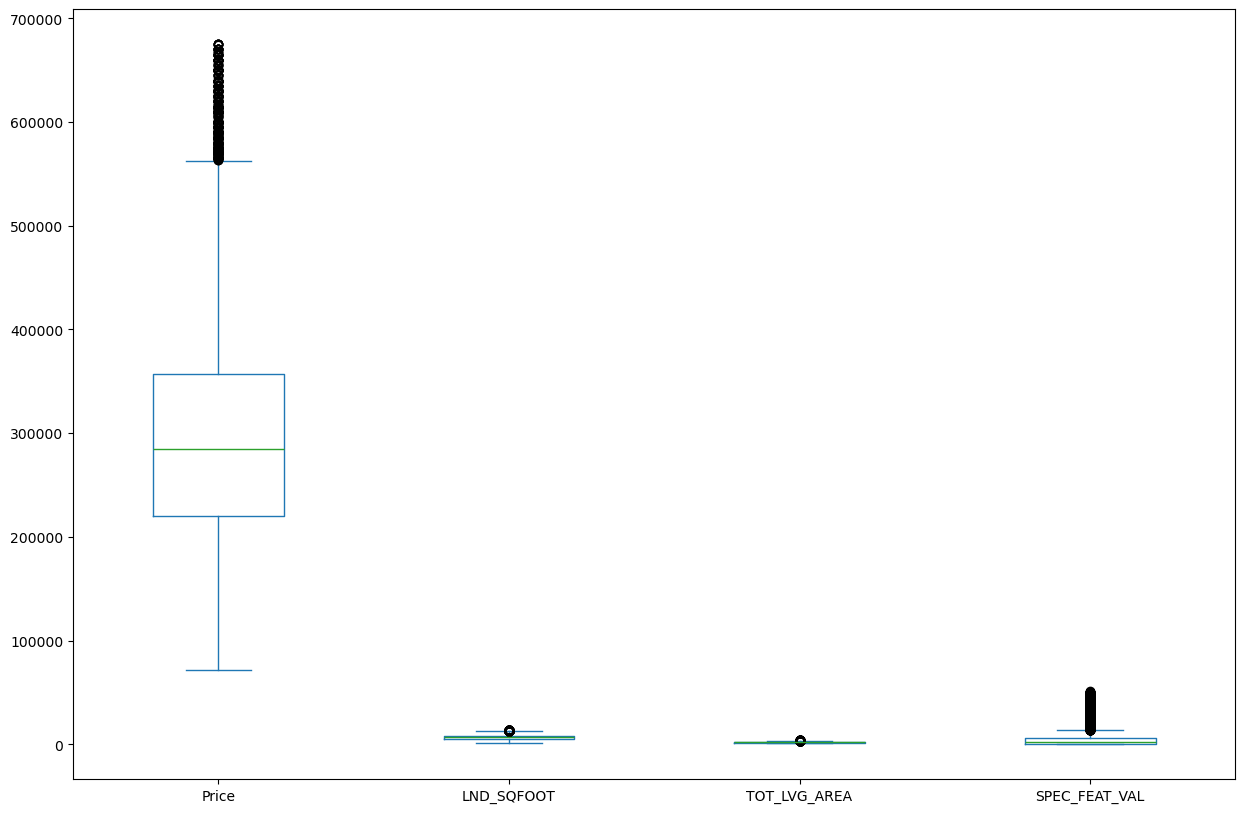

In [168]:
dfa[['Price', 'LND_SQFOOT', 'TOT_LVG_AREA','SPEC_FEAT_VAL']].plot.box(figsize = (15, 10))

<Axes: >

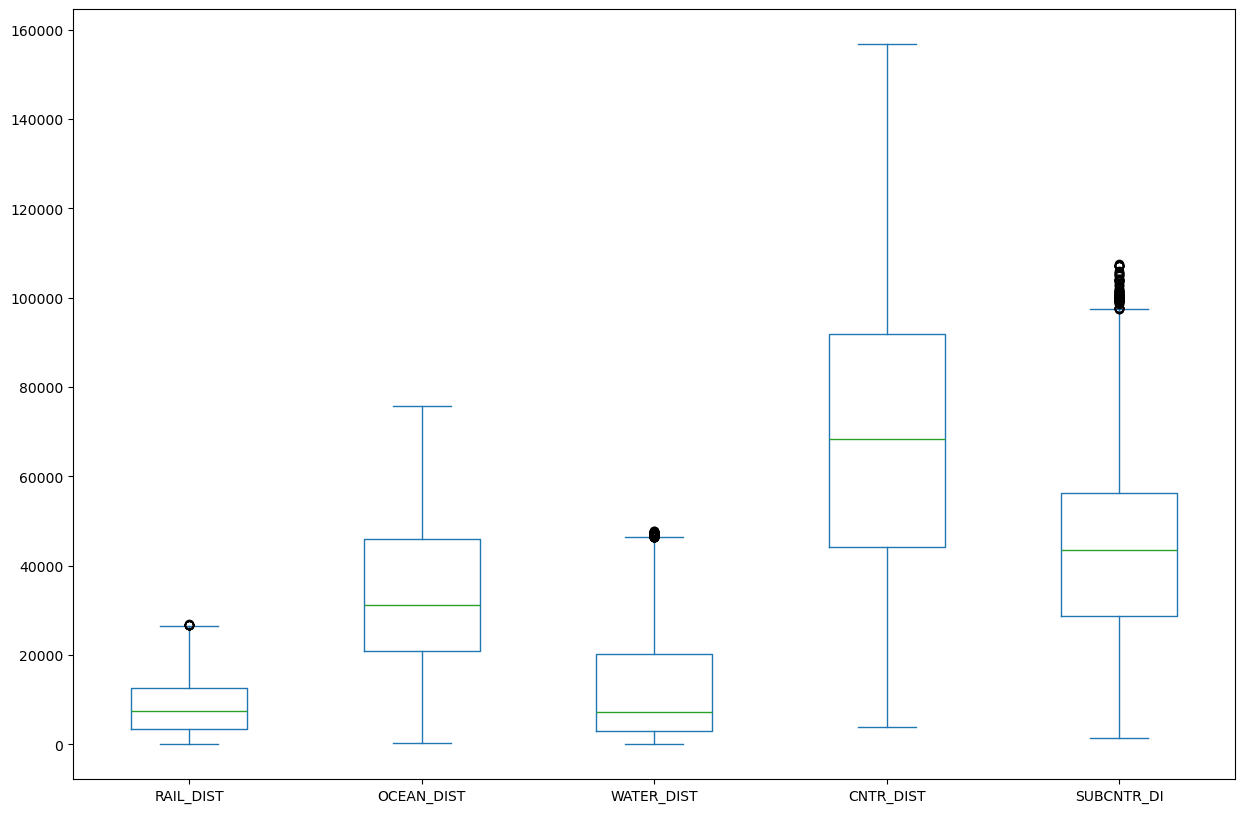

In [169]:
dfa[['RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST','CNTR_DIST','SUBCNTR_DI']].plot.box(figsize = (15, 10))

<Axes: >

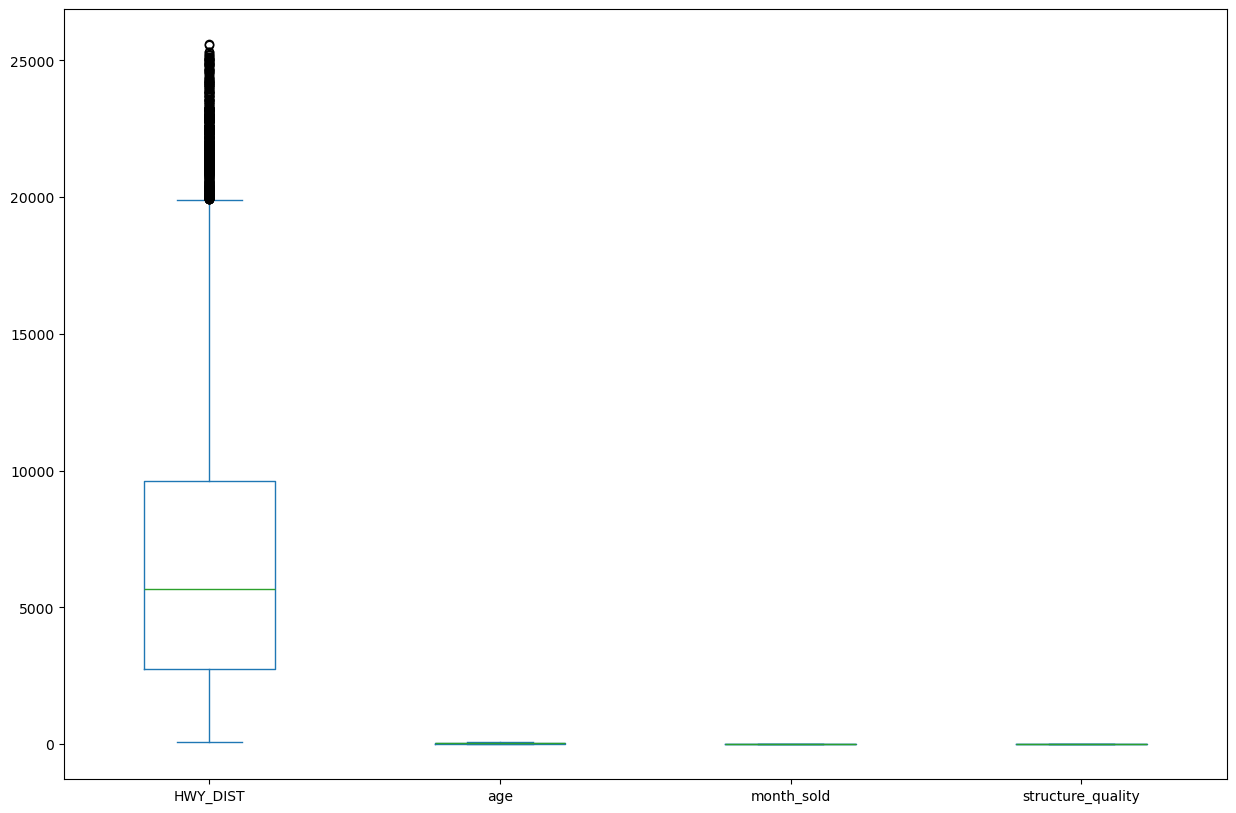

In [170]:
dfa[['HWY_DIST','age', 'month_sold', 'structure_quality']].plot.box(figsize = (15, 10))

In [171]:
dfa.shape

(11346, 34)

## Feature Engineering
### https://medium.com/@whitcrrd/linear-regression-part-ii-eda-feature-engineering-e66ea8763538

<Axes: >

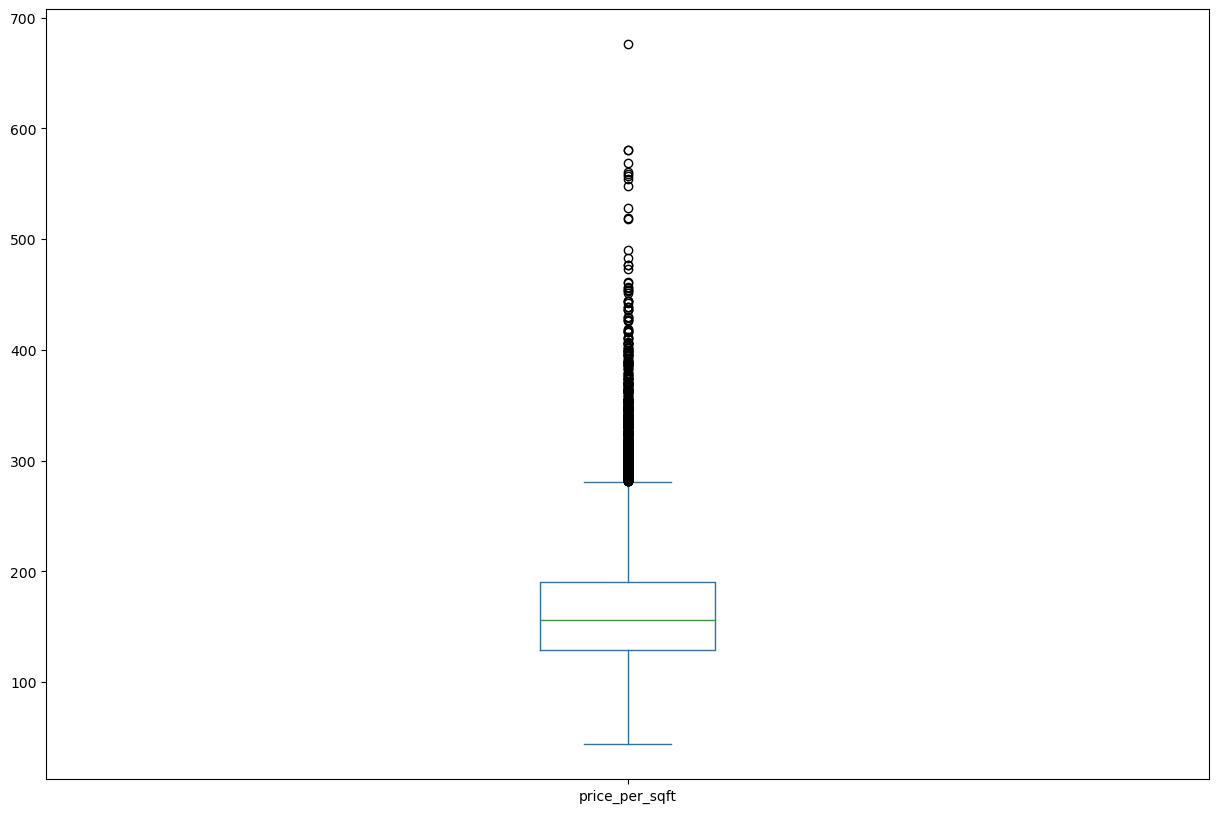

In [172]:
# Calculate Price per square foot
dfa['price_per_sqft'] = dfa.apply(lambda x: round( (x['Price'] / x['TOT_LVG_AREA'] ), 0), axis=1 )
#evaluate
dfa['price_per_sqft'].plot.box(figsize = (15, 10)) 



In [173]:
dfa.shape

(11346, 35)

In [175]:
#Approach 1
likely_cat = {}
for var in dfa.columns:
    likely_cat[var] = 1.*dfa[var].nunique()/dfa[var].count() < 0.05 #or some other threshold

In [176]:
#Approach 2
top_n = 10 
likely_cat2 = {}
for var in dfa.columns:
    likely_cat2[var] = 1.*dfa[var].value_counts(normalize=True).head(top_n).sum() > 0.8 #or some other threshold

In [177]:
likely_cat

{'LATITUDE': False,
 'LONGITUDE': False,
 'Price': False,
 'LND_SQFOOT': False,
 'TOT_LVG_AREA': False,
 'SPEC_FEAT_VAL': False,
 'RAIL_DIST': False,
 'OCEAN_DIST': False,
 'WATER_DIST': False,
 'CNTR_DIST': False,
 'SUBCNTR_DI': False,
 'HWY_DIST': False,
 'age': True,
 'avno60plus': True,
 'month_sold': True,
 'structure_quality': True,
 'YearBuilt': True,
 'LATITUDE_zscore': False,
 'LONGITUDE_zscore': False,
 'Price_zscore': False,
 'LND_SQFOOT_zscore': False,
 'TOT_LVG_AREA_zscore': False,
 'SPEC_FEAT_VAL_zscore': False,
 'RAIL_DIST_zscore': False,
 'OCEAN_DIST_zscore': False,
 'WATER_DIST_zscore': False,
 'CNTR_DIST_zscore': False,
 'SUBCNTR_DI_zscore': False,
 'HWY_DIST_zscore': False,
 'age_zscore': True,
 'avno60plus_zscore': True,
 'month_sold_zscore': True,
 'structure_quality_zscore': True,
 'YearBuilt_zscore': True,
 'price_per_sqft': True}

In [178]:
#Define function to help filter continuous variables from large num of features

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys


In [179]:
#Define function to help filter continuous variables from large num of features
listOfKeys = getKeysByValue(likely_cat2, False)
print("Continuous Variables")
#Iterate over the list of keys
for key  in listOfKeys:
        print(key)

Continuous Variables
LATITUDE
LONGITUDE
Price
LND_SQFOOT
TOT_LVG_AREA
SPEC_FEAT_VAL
RAIL_DIST
OCEAN_DIST
WATER_DIST
CNTR_DIST
SUBCNTR_DI
HWY_DIST
age
YearBuilt
LATITUDE_zscore
LONGITUDE_zscore
Price_zscore
LND_SQFOOT_zscore
TOT_LVG_AREA_zscore
SPEC_FEAT_VAL_zscore
RAIL_DIST_zscore
OCEAN_DIST_zscore
WATER_DIST_zscore
CNTR_DIST_zscore
SUBCNTR_DI_zscore
HWY_DIST_zscore
age_zscore
YearBuilt_zscore
price_per_sqft


## Target variable

C:\Users\Evans Sarker\AppData\Local\Temp\ipykernel_13444\1111625884.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfa['Price'], fit=norm);
C:\Users\Evans Sarker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


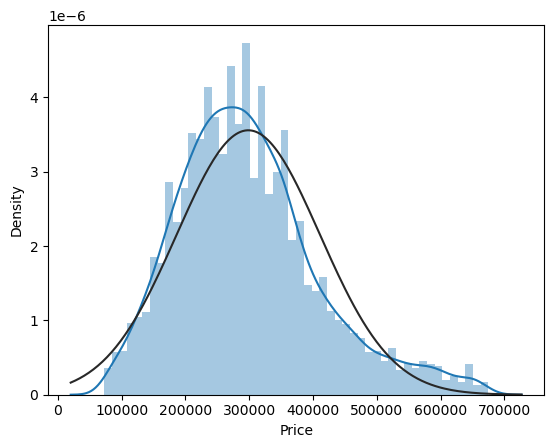

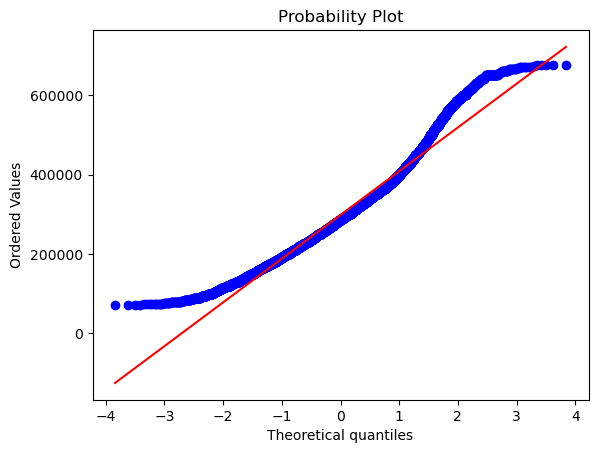

In [180]:
#histogram and normal probability plot
sns.distplot(dfa['Price'], fit=norm);
fig = plt.figure()

res = stats.probplot(dfa['Price'], plot=plt)

# the price histogram is moderately positive skew
# Our QQ-plot confirms the positive skew

In [181]:
#skewness and kurtosis
print("Skewness: %f" % dfa['Price'].skew())
print("Kurtosis: %f" % dfa['Price'].kurt())

# price is lmoderately right skewed
# moderate kurtosis

Skewness: 0.756410
Kurtosis: 0.619463


In [182]:
#Remove zscore columns
# Select columns that contains the string 'score'
dfb= [col for col in dfa.columns if 'score' in col]

print(dfb)

['LATITUDE_zscore', 'LONGITUDE_zscore', 'Price_zscore', 'LND_SQFOOT_zscore', 'TOT_LVG_AREA_zscore', 'SPEC_FEAT_VAL_zscore', 'RAIL_DIST_zscore', 'OCEAN_DIST_zscore', 'WATER_DIST_zscore', 'CNTR_DIST_zscore', 'SUBCNTR_DI_zscore', 'HWY_DIST_zscore', 'age_zscore', 'avno60plus_zscore', 'month_sold_zscore', 'structure_quality_zscore', 'YearBuilt_zscore']


In [183]:
lst=['LATITUDE_zscore', 'LONGITUDE_zscore', 'Price_zscore', 'LND_SQFOOT_zscore', 'TOT_LVG_AREA_zscore', 'SPEC_FEAT_VAL_zscore', 'RAIL_DIST_zscore', 'OCEAN_DIST_zscore', 'WATER_DIST_zscore', 'CNTR_DIST_zscore', 'SUBCNTR_DI_zscore', 'HWY_DIST_zscore', 'age_zscore', 'avno60plus_zscore', 'month_sold_zscore', 'structure_quality_zscore', 'YearBuilt_zscore']
dfc=dfa.drop(lst,axis=1)


In [184]:
dfc.shape


(11346, 18)

In [185]:
dfc.columns

Index(['LATITUDE', 'LONGITUDE', 'Price', 'LND_SQFOOT', 'TOT_LVG_AREA',
       'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold',
       'structure_quality', 'YearBuilt', 'price_per_sqft'],
      dtype='object')

In [187]:
#refine regression data
regression_data = dfc.select_dtypes(exclude= 'object')

#Safety check
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11346 entries, 0 to 13931
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           11346 non-null  float64
 1   LONGITUDE          11346 non-null  float64
 2   Price              11346 non-null  float64
 3   LND_SQFOOT         11346 non-null  int64  
 4   TOT_LVG_AREA       11346 non-null  int64  
 5   SPEC_FEAT_VAL      11346 non-null  int64  
 6   RAIL_DIST          11346 non-null  float64
 7   OCEAN_DIST         11346 non-null  float64
 8   WATER_DIST         11346 non-null  float64
 9   CNTR_DIST          11346 non-null  float64
 10  SUBCNTR_DI         11346 non-null  float64
 11  HWY_DIST           11346 non-null  float64
 12  age                11346 non-null  int64  
 13  avno60plus         11346 non-null  int64  
 14  month_sold         11346 non-null  int64  
 15  structure_quality  11346 non-null  int64  
 16  YearBuilt          11346 no

In [188]:
regression_data.columns

Index(['LATITUDE', 'LONGITUDE', 'Price', 'LND_SQFOOT', 'TOT_LVG_AREA',
       'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold',
       'structure_quality', 'YearBuilt', 'price_per_sqft'],
      dtype='object')

In [189]:
#Drop most location measures and calculated measures like pr/sqft

regression_data=regression_data[['Price', 'LND_SQFOOT', 'TOT_LVG_AREA',
       'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST',
       'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold',
       'structure_quality', 'YearBuilt']]

In [190]:
regression_data.columns

Index(['Price', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'avno60plus', 'month_sold', 'structure_quality', 'YearBuilt'],
      dtype='object')

In [191]:
# Check out our variables correlationg with price
correlations=regression_data.corr().unstack().sort_values(ascending=False) #Build correlation Matrix
correlations=pd.DataFrame(correlations).reset_index() #convert to df
correlations.columns=['col1','col2','Correlation']
price_corr=correlations.query("col1 =='Price' & col2 !='Price' ")
price_corr['Abs Corr']=abs(price_corr['Correlation'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
price_corr.sort_values(by='Abs Corr',ascending=False)

C:\Users\Evans Sarker\AppData\Local\Temp\ipykernel_13444\1640614844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_corr['Abs Corr']=abs(price_corr['Correlation'])


col1               col2  Correlation  Abs Corr
19   Price       TOT_LVG_AREA     0.563936  0.563936
36   Price  structure_quality     0.401205  0.401205
47   Price      SPEC_FEAT_VAL     0.308306  0.308306
212  Price         SUBCNTR_DI    -0.292564  0.292564
54   Price           HWY_DIST     0.272632  0.272632
66   Price          YearBuilt     0.211510  0.211510
205  Price                age    -0.211510  0.211510
76   Price         WATER_DIST     0.161845  0.161845
80   Price         LND_SQFOOT     0.157181  0.157181
189  Price          CNTR_DIST    -0.132514  0.132514
105  Price         OCEAN_DIST     0.059863  0.059863
163  Price          RAIL_DIST    -0.055047  0.055047
111  Price         month_sold     0.053522  0.053522
137  Price         avno60plus     0.015382  0.015382

# Collinearity 1


We can calculate the Variance Inflation Factor to help detect multicollinearity

-The higher the VIF,

-The more correlated a predictor is with the other predictors

-The more the standard error is inflated

-The larger the confidence interval

-The less likely it is that a coefficient will be evaluated as statistically significant

-An acceptable VIF is if it’s less than the max of 10 and 1/1-R²mode


In [192]:
#import method of detecting collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#isolate price column
mod_df = regression_data[~regression_data.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
x_features=mod_df.drop('Price', axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = x_features.columns
vif_data["VIF"] = [variance_inflation_factor(x_features.values, i) for i in range(len(x_features.columns))]
vif_data.sort_values(by="VIF", ascending=True)

feature        VIF
11         month_sold   1.005666
10         avno60plus   1.047587
2       SPEC_FEAT_VAL   1.171776
0          LND_SQFOOT   1.290688
12  structure_quality   1.463782
3           RAIL_DIST   1.487104
1        TOT_LVG_AREA   1.488594
8            HWY_DIST   1.590488
4          OCEAN_DIST   2.640807
5          WATER_DIST   3.931404
7          SUBCNTR_DI   5.187058
9                 age   5.691534
6           CNTR_DIST   7.155571
13          YearBuilt  59.240079

In [193]:
# Feature selection


In [194]:
#Drop the inf and nan VIF features even though there are none this step will be useful next

vif_data= vif_data[~vif_data.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
vif_data['feature'].values

array(['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'avno60plus', 'month_sold', 'structure_quality',
       'YearBuilt'], dtype=object)

In [195]:
#VIF for year built identified and will be removed

clean_feats=vif_data.loc[vif_data['VIF']<=10]
clean_feats['feature'].values

array(['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'avno60plus', 'month_sold', 'structure_quality'],
      dtype=object)

In [196]:
x_features=regression_data[['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'avno60plus', 'month_sold', 'structure_quality']]

In [197]:
#Determine columns again
regression_data.columns

Index(['Price', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST',
       'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST',
       'age', 'avno60plus', 'month_sold', 'structure_quality', 'YearBuilt'],
      dtype='object')

In [198]:
#Create training and test data
X=x_features
y=regression_data['Price'].values

#split the data in to training and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)


Feature 0: 226.979358
Feature 1: 4187.410990
Feature 2: 974.537092
Feature 3: 27.760337
Feature 4: 25.526037
Feature 5: 251.928453
Feature 6: 141.235257
Feature 7: 811.595237
Feature 8: 695.765451
Feature 9: 454.880028
Feature 10: 5.007032
Feature 11: 18.922267
Feature 12: 1655.041994


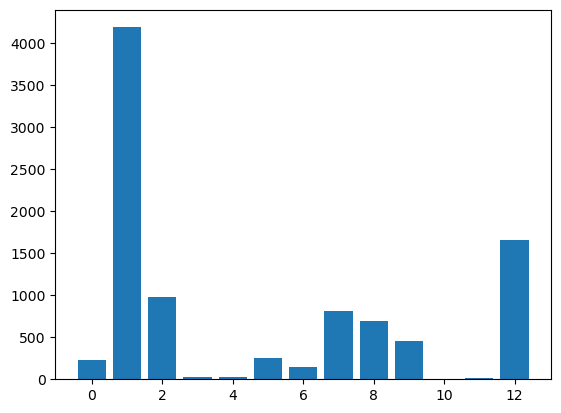

In [199]:
# example of correlation feature selection for numerical data
# the higher the feature value the better



#feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


# Linear Regression Model


In [200]:
#Build the model, using top features

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


In [201]:
X=x_features
y=regression_data['Price'].values

#split the data in to training and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)



# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

#X_train= StandardScaler().fit_transform(X_train)
# fit the model
model = LinearRegression()
model=model.fit(X_train_fs, y_train)
clf=model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
mse=np.sqrt(mt.mean_squared_error(y_test,yhat))

print('Mean Absolute Error: %.3f' % mae)

print('Mean Squared Error: %.3f' %  mse)


Mean Absolute Error: 50063.720
Mean Squared Error: 67918.509


In [202]:
#Print intercepts and coeffcient

print("Coefficient : ",clf.coef_)
print("Y Intercept : ",clf.intercept_)

Coefficient :  [ 5.41687946e+00  1.01525869e+02  1.09689153e+00 -5.05120970e-01
 -3.15509267e-02 -5.10626434e-01 -1.54692278e+00  1.29519731e+00
 -1.33991579e+03  3.14248455e+04]
Y Intercept :  112918.02769458195


In [203]:
# Let's print predictions

predictions = model.predict(X_test_fs)
for index in range(1,10):
    print('Actual : ' , y_test[index], 'Predicted: ',predictions[index])

Actual :  295000.0 Predicted:  326925.79243908287
Actual :  263000.0 Predicted:  285592.7210955493
Actual :  224000.0 Predicted:  200921.70621087938
Actual :  355000.0 Predicted:  391122.96726049896
Actual :  235000.0 Predicted:  223153.06068710354
Actual :  300000.0 Predicted:  300845.27788662736
Actual :  228000.0 Predicted:  285696.9272242147
Actual :  300000.0 Predicted:  349413.66304848064
Actual :  485000.0 Predicted:  404897.8416608129


In [204]:
#OLS Results
x=(X_train_fs)
XX=sm.add_constant(x)
model = sm.OLS(y_train, XX).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     1587.
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:00:06   Log-Likelihood:            -1.1381e+05
No. Observations:                9076   AIC:                         2.276e+05
Df Residuals:                    9065   BIC:                         2.277e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.129e+05   5316.276     21.240      0.0

Feature 0: 234.921416
Feature 1: 4268.997968
Feature 2: 954.832175
Feature 3: 28.423236
Feature 4: 29.328409
Feature 5: 247.938284
Feature 6: 154.725975
Feature 7: 855.493881
Feature 8: 711.929760
Feature 9: 419.463665
Feature 10: 3.231161
Feature 11: 28.922923
Feature 12: 1774.583038


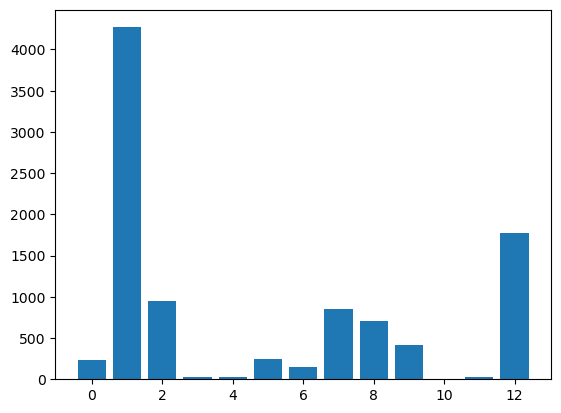

In [205]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [206]:
#Shapes
print(X_train_fs.shape)
print(X_test_fs.shape)
print(y_test.shape)
print(yhat.shape)
#print(x_test.shape)

(9076, 10)
(2270, 10)
(2270,)
(2270,)


In [207]:
# Printing selecte feature names
cols=fs.get_support(indices=True)
features_df=x_features.iloc[:,cols]
features_df.columns

Index(['LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'structure_quality'],
      dtype='object')

In [208]:
#Evaluate

#add constant to test set
X_test_fs=sm.add_constant(X_test_fs)
predictions = model.predict(X_test_fs)


C:\Users\Evans Sarker\AppData\Local\Temp\ipykernel_13444\4228824731.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins = 20)
C:\Users\Evans Sarker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Errors')

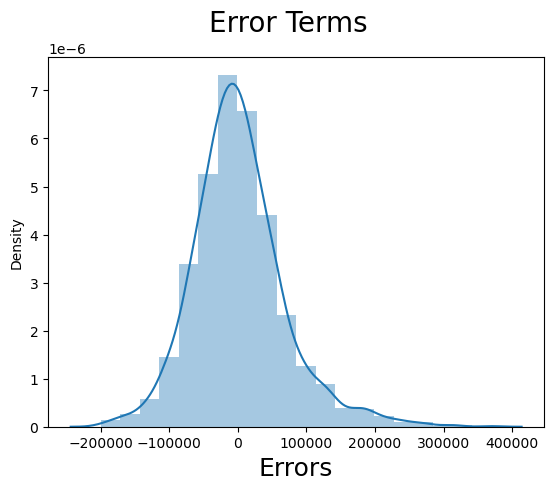

In [209]:
res = (predictions - y_test)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - predictions), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

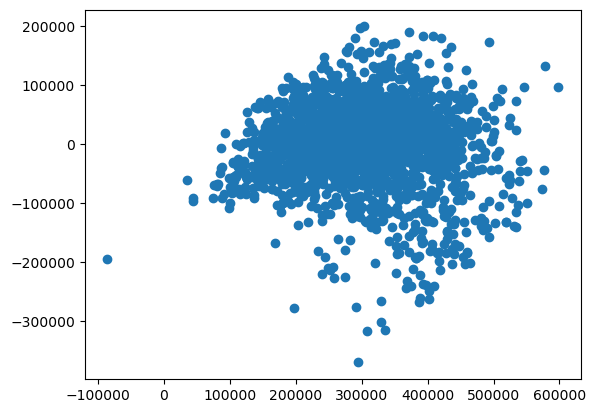

In [210]:
plt.scatter(predictions,res)
plt.show()

# Random Forest Regression 



In [211]:
X=x_features
y=regression_data['Price'].values

#split the data in to training and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)





rand_forest=RandomForestRegressor(max_depth=13,random_state=0)
rand_forest.fit(X_train, y_train)
y_pred=rand_forest.predict(X_test)

print("R squared : ")
print(mt.r2_score(y_test,y_pred))

R squared : 
0.8476849025743478


In [212]:
#Print some predictions


for index in range(1,10):
    print('Actual : ' , y_test[index], 'Predicted: ',y_pred[index])

Actual :  315000.0 Predicted:  311576.86580146383
Actual :  255000.0 Predicted:  179409.4815192873
Actual :  215000.0 Predicted:  238528.910737211
Actual :  320000.0 Predicted:  295508.870839481
Actual :  362500.0 Predicted:  354346.0021733585
Actual :  333000.0 Predicted:  302694.76625683776
Actual :  420000.0 Predicted:  478910.10772844905
Actual :  158000.0 Predicted:  158483.40118630131
Actual :  325000.0 Predicted:  344077.87188344094


In [213]:
# evaluate predictions
mae = mean_absolute_error(y_test, y_pred)
mse=np.sqrt(mt.mean_squared_error(y_test,y_pred))

print('Mean Absolute Error: %.3f' % mae)

print('Root Mean Squared Error: %.3f' %  mse)

Mean Absolute Error: 28830.273
Root Mean Squared Error: 44021.420


In [214]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(2270, 13)
(2270,)
(2270,)


In [215]:
residual = (y_pred - y_test)
print(residual.shape)

(2270,)


C:\Users\Evans Sarker\AppData\Local\Temp\ipykernel_13444\2418151487.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins = 20)
C:\Users\Evans Sarker\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Errors')

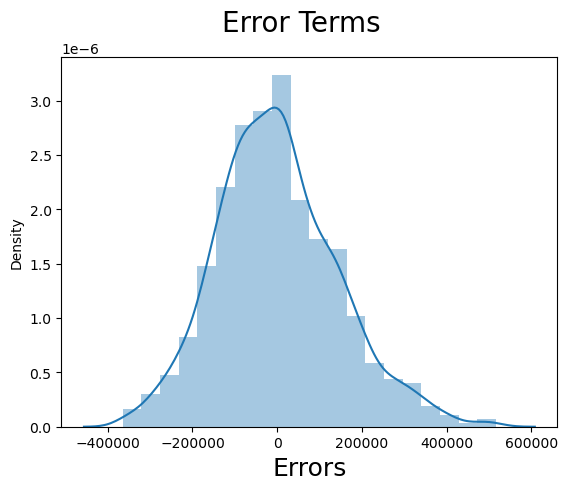

In [216]:
fig = plt.figure()
sns.distplot((y_test - predictions), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

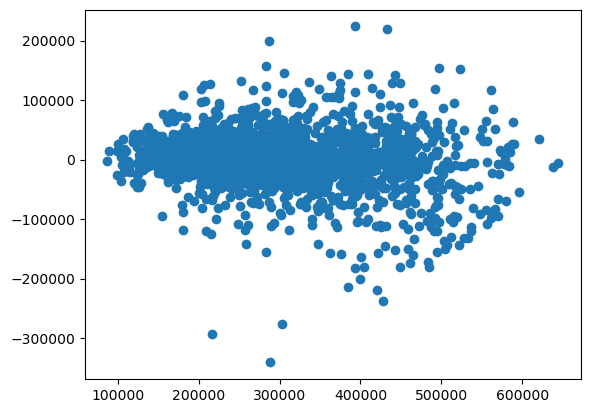

In [217]:
plt.scatter(y_pred,residual)
plt.show()

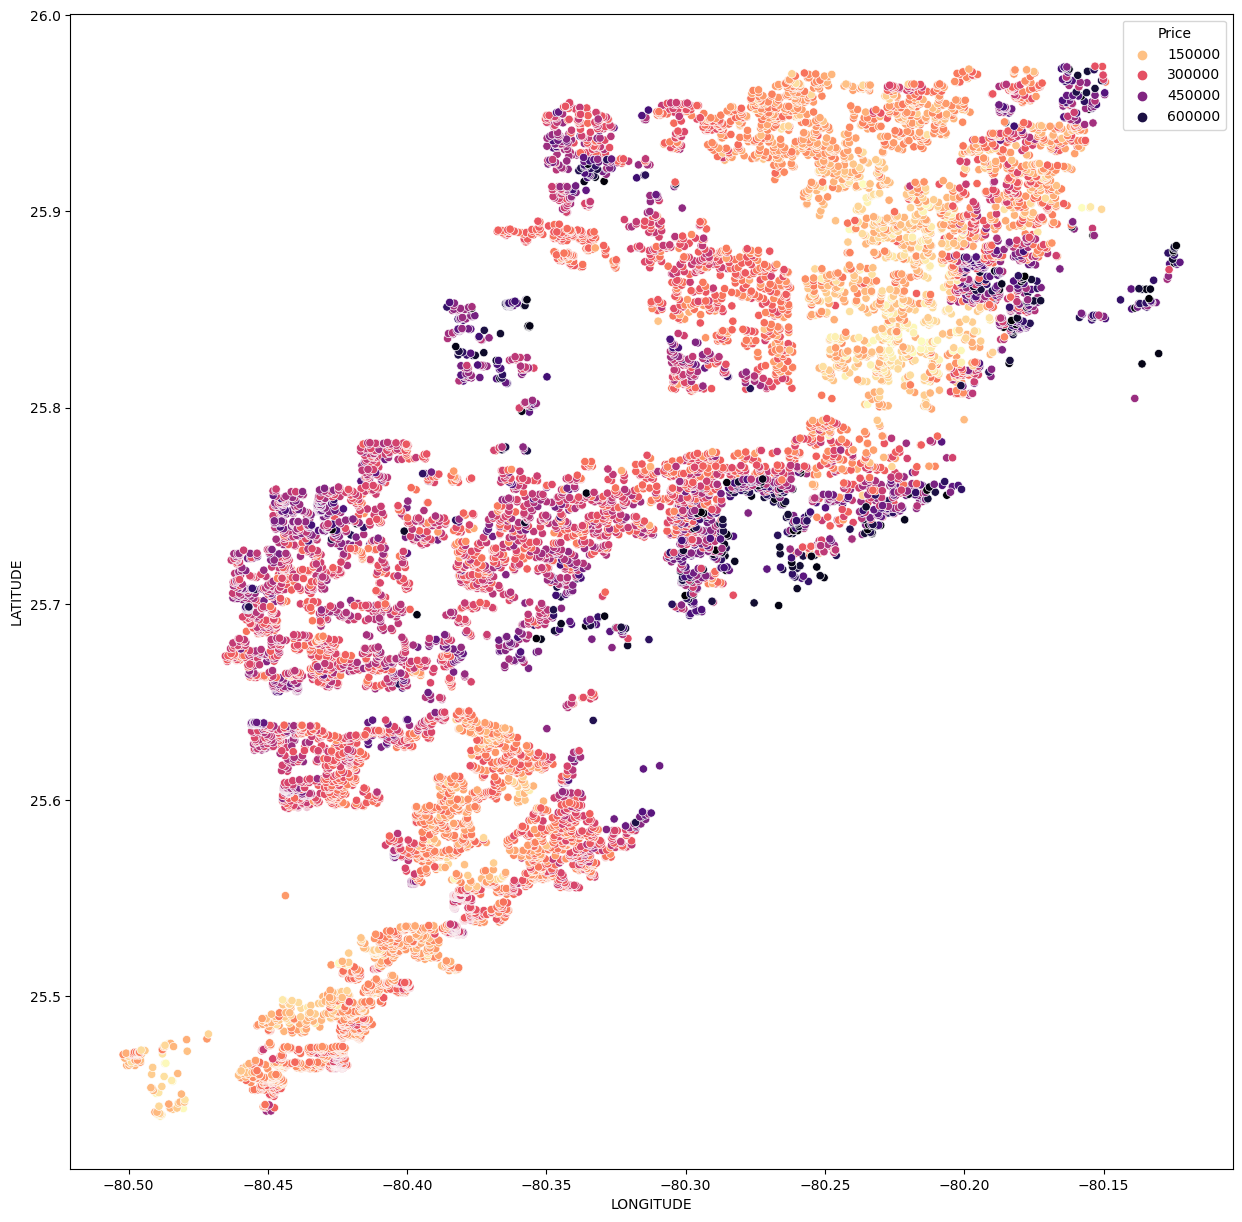

In [218]:
# plotting latitude and longitude as a visual scatter plot to look for location-based outliers

plt.figure(figsize=(15,15))

sns.scatterplot(data=dfa, x="LONGITUDE", y="LATITUDE", hue="Price", palette="magma_r");

array([[<Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'LND_SQFOOT'}>],
       [<Axes: title={'center': 'TOT_LVG_AREA'}>,
        <Axes: title={'center': 'SPEC_FEAT_VAL'}>,
        <Axes: title={'center': 'RAIL_DIST'}>,
        <Axes: title={'center': 'OCEAN_DIST'}>],
       [<Axes: title={'center': 'WATER_DIST'}>,
        <Axes: title={'center': 'CNTR_DIST'}>,
        <Axes: title={'center': 'SUBCNTR_DI'}>,
        <Axes: title={'center': 'HWY_DIST'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avno60plus'}>,
        <Axes: title={'center': 'month_sold'}>,
        <Axes: title={'center': 'structure_quality'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'price_per_sqft'}>, <Axes: >, <Axes: >]],
      dtype=object)

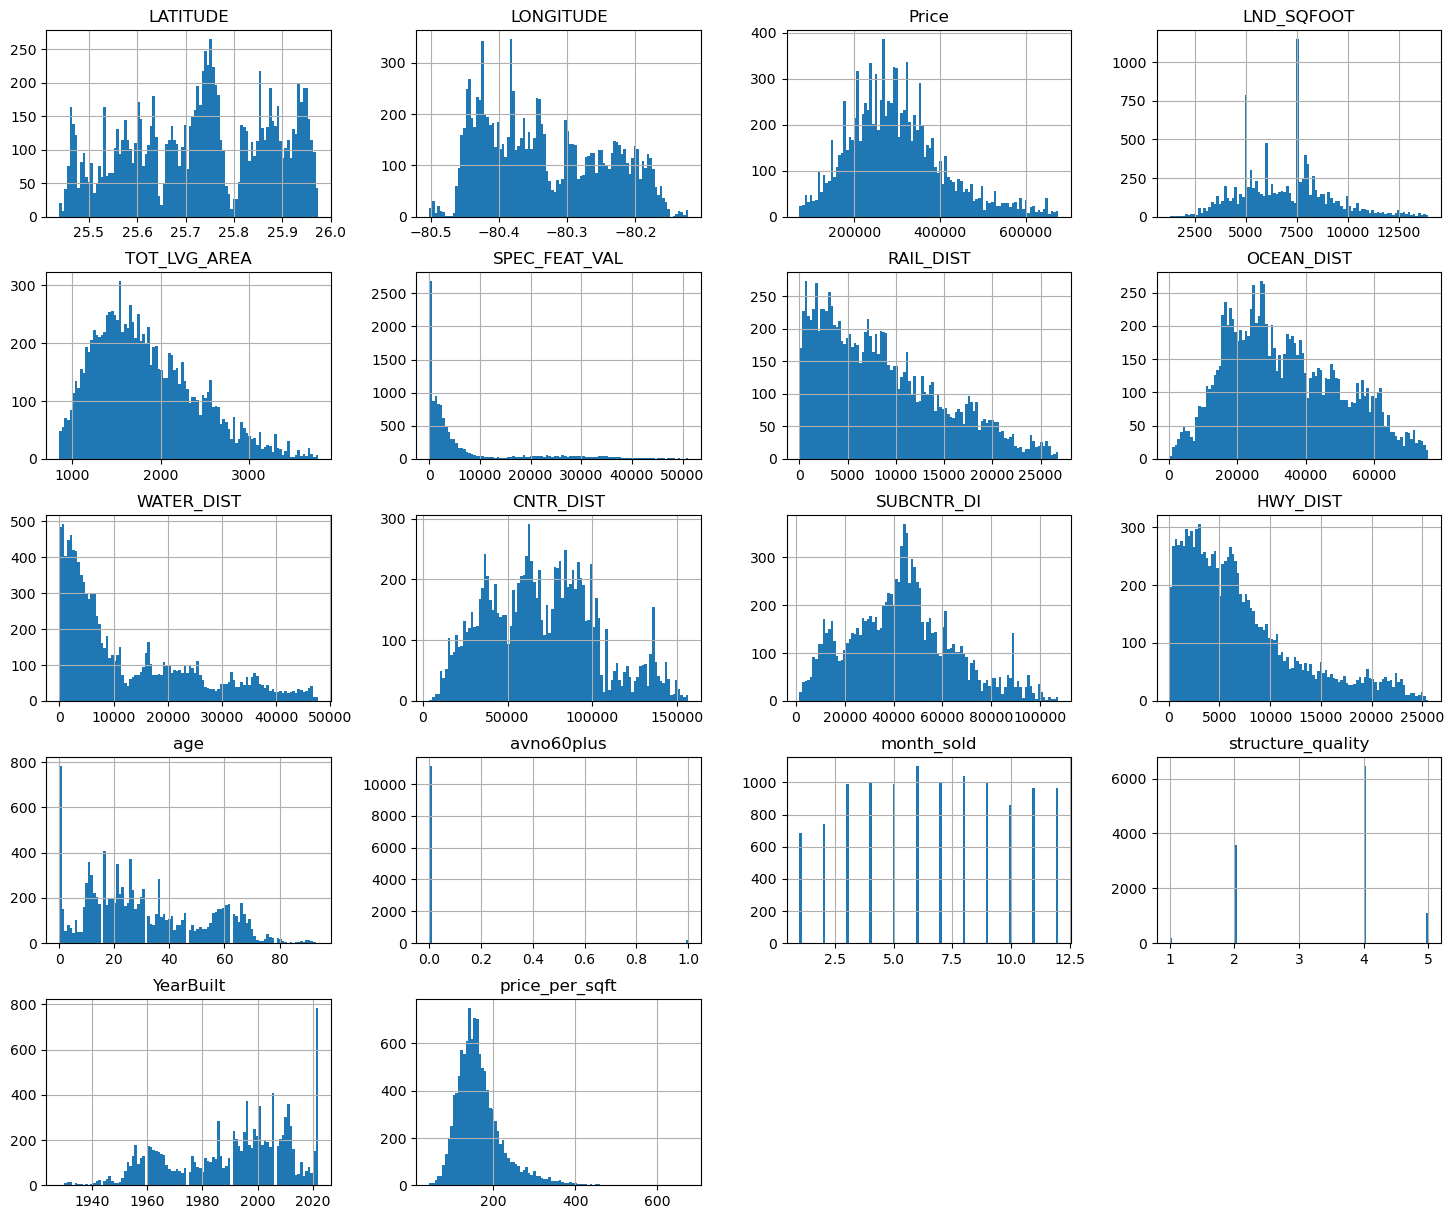

In [219]:
# Since there are many features we look at matrix firstly

dfc.hist(figsize=(18,15),bins=100)

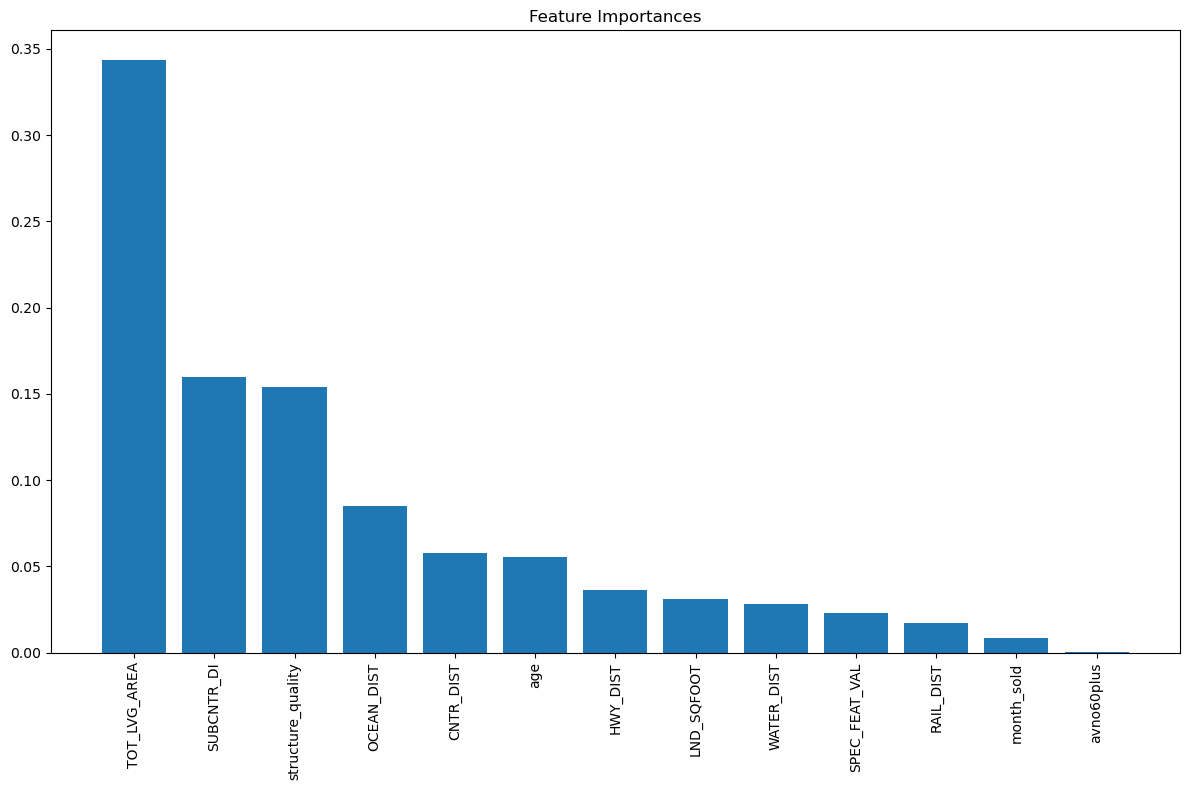

In [220]:
# Visualize feature importances from Random Forest model
importances = rand_forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

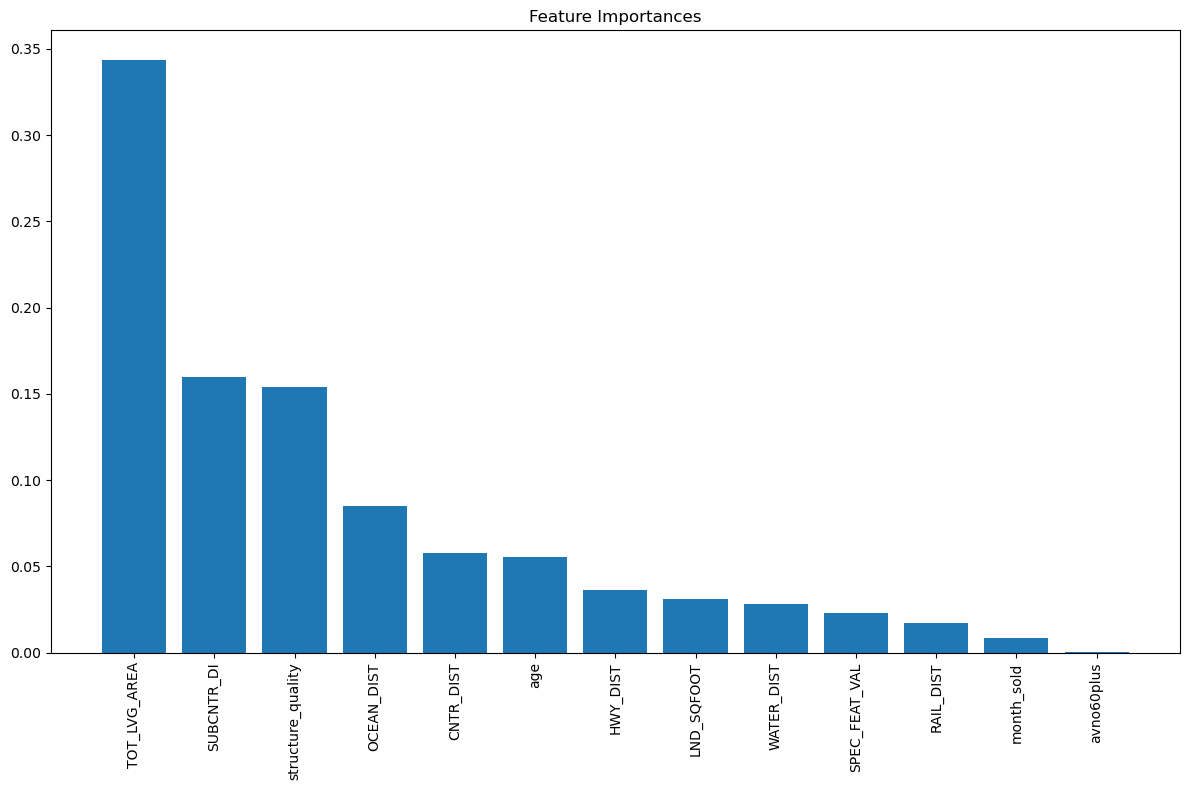

In [221]:
# Feature Importance Visualization
importances = rand_forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


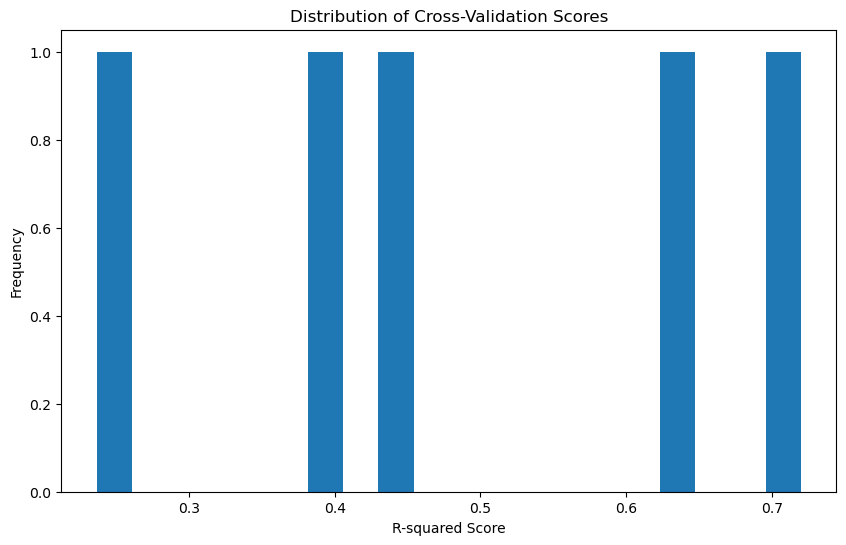

Mean CV Score: 0.4879 (+/- 0.3491)


In [223]:
# Perform cross-validation and visualize score distribution
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rand_forest, X, y, cv=5, scoring='r2')

plt.figure(figsize=(10, 6))
plt.hist(cv_scores, bins=20)
plt.title("Distribution of Cross-Validation Scores")
plt.xlabel("R-squared Score")
plt.ylabel("Frequency")
plt.show()

print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


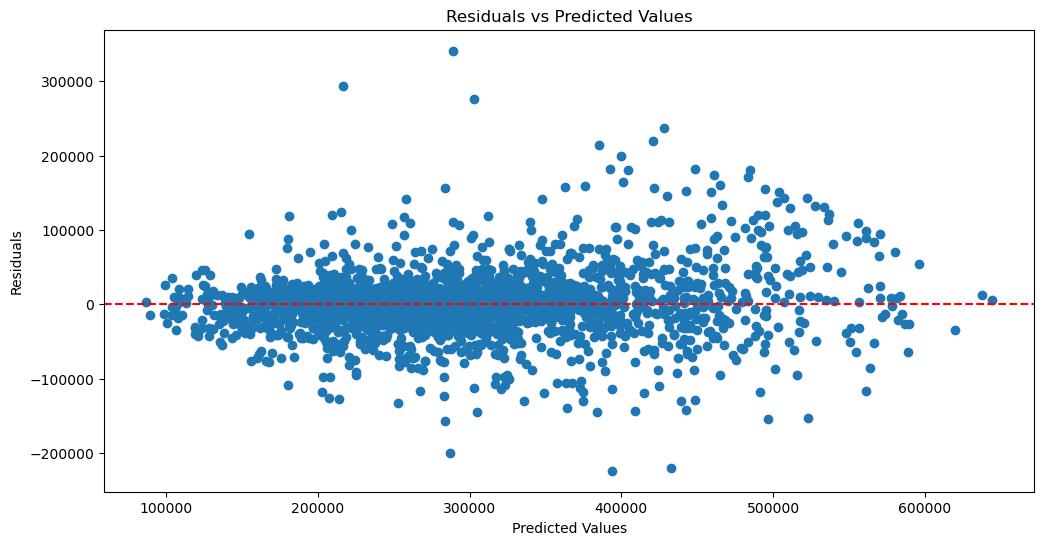

In [224]:
# Assuming `y_test` are the true values and `y_pred` are the predicted values
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


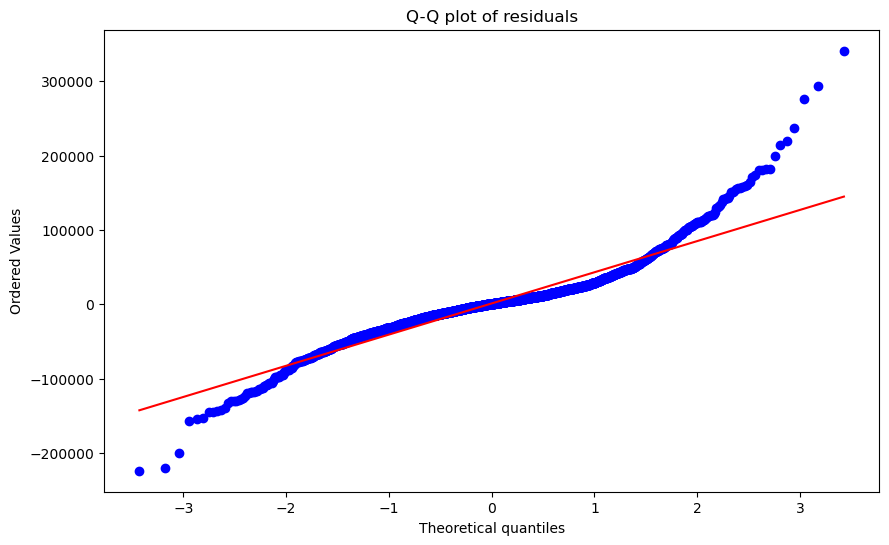

In [225]:
# Assuming `residuals` is defined from the residual analysis
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q plot of residuals")
plt.show()
